
#Employee Salary Classifier



### Importing all the libraries

In [210]:
pip install fuzzywuzzy

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from fuzzywuzzy import fuzz
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [212]:
df = pd.read_csv('salary.csv') #reading out the csv

In [213]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [214]:
#Renaming the columns - creating the object


In [215]:
rename_column = {'How old are you?':'Age',
                 'What industry do you work in?':'Industry',
                 'If your job title needs additional context, please clarify here:':'Additional Details',
                 f"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":'Annual Salary',
                 "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.":'Bonus',
                 'Please indicate the currency':'Currency',
                 'If "Other," please indicate the currency here: ':'Others',
                 'If your income needs additional context, please provide it here:':'Addition Salary Details',
                 'What country do you work in?':'Country',
                 "If you're in the U.S., what state do you work in?":'State',
                 'What city do you work in?':'City',
                 'How many years of professional work experience do you have overall?':'Total Work Experience',
                 'How many years of professional work experience do you have in your field?':'Relevant Work Experience',
                 'What is your highest level of education completed?':'Education Degree',
                 'What is your gender?':'Gender',
                 'What is your race? (Choose all that apply.)':'Race'}

### As we can see the columns have very big names we will rename them as per the convinience

In [216]:
df.rename(columns=rename_column,inplace=True)
df

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28028,4/6/2024 4:36:03,45-54,Education (Primary/Secondary),Math Teacher,NaN,63000,0.0,USD,NaN,NaN,United States,Indiana,Indianapolis,21 - 30 years,11 - 20 years,Master's degree,Woman,Black or African American
28029,4/6/2024 14:30:24,25-34,Computing or Tech,Data Analyst,NaN,101150,10000.0,USD,NaN,NaN,United States,Washington,Vancouver,5-7 years,5-7 years,College degree,Man,NaN
28030,4/9/2024 9:38:51,under 18,"Accounting, Banking & Finance",student,testing use,5000000,40.0,USD,HKD,NaN,China,"Alabama, South Carolina",Hong Kong,5-7 years,1 year or less,High School,Non-binary,"Hispanic, Latino, or Spanish origin"
28031,4/12/2024 11:00:03,35-44,Art & Design,Digital designer,Email design,60000,0.0,GBP,NaN,NaN,United Kingdom,NaN,London,11 - 20 years,8 - 10 years,College degree,Man,White


In [217]:
df.shape

(28033, 18)

In [218]:
df['Country']=df['Country'].str.lower() #converting the countries name to lower case

In [219]:
df['Country']=df['Country'].str.strip()

### We have used the fuzzywuzzy matching algorithm to match the names for country closely resembling USA

In [220]:
lst_1=[]
val=0

#used fuzzy wuzzy for capturing all the different variations for United States of America
for k , v in df['Country'].value_counts().items():
  if fuzz.ratio("United States Of America".lower(),k )>70:
    lst_1.append(k)
    val+=v
  elif fuzz.ratio("USA".lower(),k )>70:
    lst_1.append(k)
    val+=v
  elif fuzz.ratio("United States".lower(),k )>70:
    lst_1.append(k)
    val+=v
  elif fuzz.ratio("U.S.A".lower(),k )>70:
    lst_1.append(k)
    val+=v
print(lst_1)
print(val)

['united states', 'usa', 'us', 'u.s.', 'united states of america', 'u.s.a.', 'u.s', 'united state', 'unites states', 'united stated', 'u.s.a', 'the united states', 'u. s.', 'united sates', 'unitedstates', 'united state of america', 'united stares', 'united statea', 'united status', 'unite states', 'united states of american', 'united sates of america', 'unitied states', 'usab', 'united sttes', 'united stateds', 'uniter statez', 'united statss', 'united  states', 'united states is america', 'usat', 'untied states', 'unitef stated', 'ua', 'usaa', 'united states- puerto rico', 'united statues', 'uniyed states', 'uniyes states', 'united states of americas', 'u.sa', 'united statees', 'united statws', 'uniited states', 'unted states', 'united statesp', 'united stattes', 'united statew', 'uniteed states']
23119


### Replaced the found list with common name USA

In [221]:
df['Country'].replace(to_replace=lst_1,value="USA",inplace=True)

In [222]:
df['Country'].value_counts()

Country
USA                    23119
canada                  1675
uk                       692
united kingdom           633
australia                389
                       ...  
australi                   1
united kingdom.            1
cuba                       1
trinidad and tobago        1
ibdia                      1
Name: count, Length: 207, dtype: int64

In [223]:
#fetching the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28033 entries, 0 to 28032
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 28033 non-null  object 
 1   Age                       28033 non-null  object 
 2   Industry                  27959 non-null  object 
 3   Job title                 28032 non-null  object 
 4   Additional Details        7256 non-null   object 
 5   Annual Salary             28033 non-null  object 
 6   Bonus                     20748 non-null  float64
 7   Currency                  28033 non-null  object 
 8   Others                    202 non-null    object 
 9   Addition Salary Details   3039 non-null   object 
 10  Country                   28033 non-null  object 
 11  State                     23022 non-null  object 
 12  City                      27951 non-null  object 
 13  Total Work Experience     28033 non-null  object 
 14  Releva

In [224]:
df.isna().sum()

Timestamp                       0
Age                             0
Industry                       74
Job title                       1
Additional Details          20777
Annual Salary                   0
Bonus                        7285
Currency                        0
Others                      27831
Addition Salary Details     24994
Country                         0
State                        5011
City                           82
Total Work Experience           0
Relevant Work Experience        0
Education Degree              218
Gender                        169
Race                          174
dtype: int64

In [225]:
df=df[df['Country']=='USA']

In [226]:
df['Currency'].value_counts()

Currency
USD        23097
Other         13
CAD            3
EUR            2
SEK            1
JPY            1
GBP            1
AUD/NZD        1
Name: count, dtype: int64

In [227]:
# We only considered the data whose currency is USD as we are exploring the US data
df=df[df['Currency']=='USD']

In [228]:
df.shape

(23097, 18)

In [229]:
df.isna().sum()

Timestamp                       0
Age                             0
Industry                       57
Job title                       1
Additional Details          17046
Annual Salary                   0
Bonus                        5774
Currency                        0
Others                      23075
Addition Salary Details     20602
Country                         0
State                         171
City                           62
Total Work Experience           0
Relevant Work Experience        0
Education Degree              151
Gender                        139
Race                          144
dtype: int64

### Exploring data for processing

In [230]:
df['Addition Salary Details'].value_counts()

Addition Salary Details
Overtime                                                                                                                                                                                            3
RSUs                                                                                                                                                                                                3
Commission                                                                                                                                                                                          3
Hourly                                                                                                                                                                                              3
Bonus not guaranteed                                                                                                                                                                    

In [231]:
df['Additional Details'].value_counts()

Additional Details
Fundraising                                                                                                                                                                     19
In commercial real estate industry                                                                                                                                              10
Attorney                                                                                                                                                                         7
Public library                                                                                                                                                                   7
Librarian                                                                                                                                                                        6
                                                                                      

In [232]:
df.describe()

,Bonus
count,1.732300e+04
mean,1.267417e+04
std,4.621347e+04
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.500000e+06


In [233]:
df['Annual Salary'].value_counts()

Annual Salary
60,000     342
70,000     339
80,000     332
65,000     325
75,000     319
          ... 
105,600      1
60,570       1
50,689       1
57,312       1
101150       1
Name: count, Length: 3528, dtype: int64

In [234]:
df['Annual Salary'] = df['Annual Salary'].str.replace(',',"")

In [235]:
df['Annual Salary']

0         55000
2         34000
3         62000
4         60000
5         62000
          ...  
28024    105000
28025    190000
28027    115000
28028     63000
28029    101150
Name: Annual Salary, Length: 23097, dtype: object

In [236]:
df['Annual Salary'] = df['Annual Salary'].astype(float)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23097 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23097 non-null  object 
 1   Age                       23097 non-null  object 
 2   Industry                  23040 non-null  object 
 3   Job title                 23096 non-null  object 
 4   Additional Details        6051 non-null   object 
 5   Annual Salary             23097 non-null  float64
 6   Bonus                     17323 non-null  float64
 7   Currency                  23097 non-null  object 
 8   Others                    22 non-null     object 
 9   Addition Salary Details   2495 non-null   object 
 10  Country                   23097 non-null  object 
 11  State                     22926 non-null  object 
 12  City                      23035 non-null  object 
 13  Total Work Experience     23097 non-null  object 
 14  Relevant Wo

### Preprocessing the Education degree

In [238]:
df['Education Degree'].value_counts()

Education Degree
College degree                        11234
Master's degree                        7432
Some college                           1628
Professional degree (MD, JD, etc.)     1131
PhD                                    1118
High School                             403
Name: count, dtype: int64

In [239]:
df[df['Education Degree'] == 'High School']

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
153,4/27/2021 11:06:00,45-54,Insurance,Senior Client Service Representative,NaN,73000.0,0.0,USD,NaN,NaN,USA,Colorado,Denver,31 - 40 years,31 - 40 years,High School,Woman,White
210,4/27/2021 11:06:48,35-44,Retail,Loss prevention manager,NaN,87000.0,15000.0,USD,NaN,NaN,USA,California,San Jose,8 - 10 years,2 - 4 years,High School,Woman,White
284,4/27/2021 11:07:42,35-44,Transport or Logistics,Executive Administrator,NaN,80000.0,5000.0,USD,NaN,The additional income is contribution annually...,USA,New York,New York,21 - 30 years,21 - 30 years,High School,Woman,White
352,4/27/2021 11:08:34,45-54,Property or Construction,Shop Coordinator,Vehicle/Equipment Maintenance Admin,53000.0,6000.0,USD,NaN,NaN,USA,NaN,Orlando,21 - 30 years,8 - 10 years,High School,Woman,White
392,4/27/2021 11:09:17,35-44,Law,Transcriptionist,Transcribe law enforcement tapes,50000.0,NaN,USD,NaN,NaN,USA,Minnesota,Minneapolis,11 - 20 years,2 - 4 years,High School,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27540,11/29/2021 18:08:55,25-34,Engineering or Manufacturing,Production Color Quality Engineer,"prepress, print process, and color management",72000.0,NaN,USD,NaN,NaN,USA,Rhode Island,providence,11 - 20 years,11 - 20 years,High School,Man,White
27787,5/5/2022 8:56:45,25-34,Recruitment or HR,Human Resource Generalist,NaN,50000.0,NaN,USD,NaN,NaN,USA,Ohio,Columbus,8 - 10 years,5-7 years,High School,Woman,White
27880,10/6/2022 9:56:48,18-24,Fast food,Barista,NaN,31200.0,NaN,USD,NaN,NaN,USA,New York,Albany,1 year or less,1 year or less,High School,Other or prefer not to answer,"Hispanic, Latino, or Spanish origin"
27972,8/21/2023 22:47:22,under 18,"Accounting, Banking & Finance",McDonalds Crew Member,NaN,40000.0,NaN,USD,NaN,NaN,USA,Minnesota,NaN,1 year or less,1 year or less,High School,Woman,Asian or Asian American


### We clubbed different degree into 4 most common degree categories

In [240]:
df['Education Degree'].replace(to_replace='Professional degree (MD, JD, etc.)',value="Master's degree",inplace=True)

In [241]:
df['Education Degree'].replace(to_replace='Some college',value="College degree",inplace=True)

In [242]:
df['Education Degree'].replace(to_replace='College degree',value="Bachelor's degree",inplace=True)

In [243]:
df['Education Degree'].value_counts()

Education Degree
Bachelor's degree    12862
Master's degree       8563
PhD                   1118
High School            403
Name: count, dtype: int64

### Replaced null values with mode

In [244]:
df['Education Degree'].fillna(df['Education Degree'].mode()[0],inplace=True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23097 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23097 non-null  object 
 1   Age                       23097 non-null  object 
 2   Industry                  23040 non-null  object 
 3   Job title                 23096 non-null  object 
 4   Additional Details        6051 non-null   object 
 5   Annual Salary             23097 non-null  float64
 6   Bonus                     17323 non-null  float64
 7   Currency                  23097 non-null  object 
 8   Others                    22 non-null     object 
 9   Addition Salary Details   2495 non-null   object 
 10  Country                   23097 non-null  object 
 11  State                     22926 non-null  object 
 12  City                      23035 non-null  object 
 13  Total Work Experience     23097 non-null  object 
 14  Relevant Wo

In [246]:
df['Gender'].value_counts()

Gender
Woman                            17897
Man                               4228
Non-binary                         597
Other or prefer not to answer      235
Prefer not to answer                 1
Name: count, dtype: int64

### Preprocessing gender into 3 categories

In [247]:
df['Gender'].replace(to_replace=['Non-binary','Other or prefer not to answer','Prefer not to answer'],value="Other",inplace=True)

In [248]:
df['Gender'].value_counts()

Gender
Woman    17897
Man       4228
Other      833
Name: count, dtype: int64

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23097 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23097 non-null  object 
 1   Age                       23097 non-null  object 
 2   Industry                  23040 non-null  object 
 3   Job title                 23096 non-null  object 
 4   Additional Details        6051 non-null   object 
 5   Annual Salary             23097 non-null  float64
 6   Bonus                     17323 non-null  float64
 7   Currency                  23097 non-null  object 
 8   Others                    22 non-null     object 
 9   Addition Salary Details   2495 non-null   object 
 10  Country                   23097 non-null  object 
 11  State                     22926 non-null  object 
 12  City                      23035 non-null  object 
 13  Total Work Experience     23097 non-null  object 
 14  Relevant Wo

In [250]:
df['Gender'] = df['Gender'].fillna('Other')

### Preprocessing State and City

In [251]:
df['State'] = df['State'].str.split(',',n=1,expand=True)[0]

In [252]:
df[df['State'].isna()]

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
10,4/27/2021 11:03:03,25-34,Nonprofits,Office Manager,NaN,47500.0,0.0,USD,NaN,NaN,USA,NaN,"Boston, MA",5-7 years,5-7 years,Bachelor's degree,Woman,White
21,4/27/2021 11:03:24,35-44,Nonprofits,Program Coordinator & Assistant Editor,NaN,50000.0,NaN,USD,NaN,NaN,USA,NaN,Atlanta,5-7 years,2 - 4 years,PhD,Woman,White
71,4/27/2021 11:04:39,35-44,Aerospace contracting,Project engineer,Cost/schedule analyst,122000.0,3600.0,USD,NaN,NaN,USA,NaN,Colorado Springs,11 - 20 years,11 - 20 years,Master's degree,Woman,White
132,4/27/2021 11:05:46,35-44,Computing or Tech,Product Manager,NaN,130000.0,0.0,USD,NaN,NaN,USA,NaN,Philadelphia,11 - 20 years,11 - 20 years,Bachelor's degree,Man,White
133,4/27/2021 11:05:46,55-64,Education (Higher Education),career services professional,NaN,55000.0,NaN,USD,NaN,NaN,USA,NaN,Indianapolis,21 - 30 years,21 - 30 years,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25323,5/6/2021 12:39:18,35-44,Government and Public Administration,Senior Fiscal Analyst,NaN,130000.0,25000.0,USD,NaN,NaN,USA,NaN,Prefer not to disclose,11 - 20 years,11 - 20 years,Master's degree,Woman,White
25599,5/7/2021 1:18:37,25-34,Health care,Physician Assistant,NaN,135000.0,NaN,USD,NaN,NaN,USA,NaN,Springfield,2 - 4 years,2 - 4 years,Master's degree,Woman,White
26119,5/12/2021 23:53:52,35-44,Media & Digital,Editor,Medium sized press in a particular niche,45000.0,0.0,USD,NaN,NaN,USA,NaN,Fully remote company based out of CA,11 - 20 years,8 - 10 years,Bachelor's degree,Woman,White
26494,6/22/2021 11:47:22,35-44,Education (Primary/Secondary),High School Teacher,NaN,56650.0,1000.0,USD,NaN,NaN,USA,NaN,Philadelphia,5-7 years,2 - 4 years,Master's degree,Woman,White


In [253]:
df['City'] = df['City'].str.split(',',n=1,expand=True)[0]


In [254]:
df['City'] = df['City'].str.strip()

In [255]:
missing_state = df[df['State'].isna()]['City'].tolist()
len(missing_state)

171

### We fetched cities of missing states and filled its null values with the corresponding city name and done similarly for cities as well

In [256]:
for data in missing_state:
  df2 =  df[df['City'] == data]
  df2 = df2[df2['State'].isnull() == False]['State'].to_list()
  if df2:
    print(df2[0],type(df2[0]))
    df.loc[df.City == data, 'State'] = df2[0]

Massachusetts <class 'str'>
Georgia <class 'str'>
Colorado <class 'str'>
Pennsylvania <class 'str'>
Indiana <class 'str'>
New York <class 'str'>
District of Columbia <class 'str'>
Oregon <class 'str'>
Alabama <class 'str'>
New York <class 'str'>
District of Columbia <class 'str'>
Pennsylvania <class 'str'>
Nebraska <class 'str'>
Florida <class 'str'>
California <class 'str'>
Georgia <class 'str'>
New York <class 'str'>
District of Columbia <class 'str'>
Pennsylvania <class 'str'>
California <class 'str'>
Indiana <class 'str'>
New York <class 'str'>
New York <class 'str'>
New York <class 'str'>
California <class 'str'>
Arizona <class 'str'>
California <class 'str'>
District of Columbia <class 'str'>
California <class 'str'>
Utah <class 'str'>
North Carolina <class 'str'>
New Jersey <class 'str'>
New York <class 'str'>
Colorado <class 'str'>
Washington <class 'str'>
Minnesota <class 'str'>
Oregon <class 'str'>
District of Columbia <class 'str'>
District of Columbia <class 'str'>
District

In [257]:
df['State'].isna().sum()

43

In [258]:
df[df['State'].isnull()]['City']

489                                         Ann Arbor area
854                                                AtlantA
890                                       Remote (Chicago)
1399                                               various
1452                                             Metro NYC
1608                                      MCOL New England
1666                                      Major Metro Area
1672                                          Clifton Park
1735                                               Florida
1822                                            Temperance
1925                                         Mid-size city
2694                                          Midwest area
3216                                    Decline to provide
4431                                                   NaN
4837                                             Remote US
5288                          Remote employee pre-pandemic
6769                                            Streamwo

### Dropping rows having both city and state as null

In [259]:
df.dropna(subset=['State','City'],how='all',inplace=True)

In [260]:
df['Industry'].fillna('Other',inplace=True)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23093 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23093 non-null  object 
 1   Age                       23093 non-null  object 
 2   Industry                  23093 non-null  object 
 3   Job title                 23092 non-null  object 
 4   Additional Details        6050 non-null   object 
 5   Annual Salary             23093 non-null  float64
 6   Bonus                     17320 non-null  float64
 7   Currency                  23093 non-null  object 
 8   Others                    22 non-null     object 
 9   Addition Salary Details   2495 non-null   object 
 10  Country                   23093 non-null  object 
 11  State                     23054 non-null  object 
 12  City                      23035 non-null  object 
 13  Total Work Experience     23093 non-null  object 
 14  Relevant Wo

In [262]:
df['Annual Salary'].describe().astype(str)

count              23093.0
mean     92364.41653314857
std      96667.57127854566
min                    0.0
25%                56200.0
50%                78408.0
75%               112000.0
max             10000000.0
Name: Annual Salary, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0ecf7cfdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0ecf848250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0ecf7cfaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ecf848790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ecf848a30>],
 'means': []}

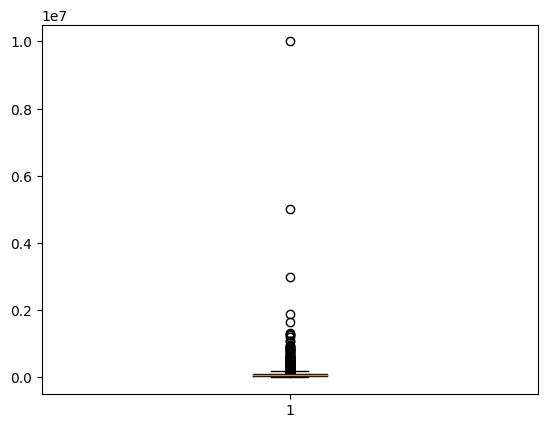

In [263]:
plt.boxplot(df['Annual Salary']) #as we can see there are lot of outliers in the target column

<Axes: xlabel='Annual Salary', ylabel='Density'>

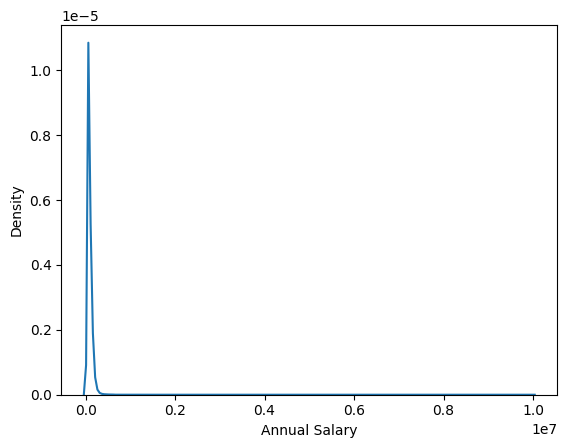

In [264]:
sns.kdeplot(df['Annual Salary'])

### Preprocessing Age and work experience

In [265]:
df['Age'].value_counts()

Age
25-34         10256
35-44          8229
45-54          2669
18-24           974
55-64           868
65 or over       86
under 18         11
Name: count, dtype: int64

In [266]:
df[df['Age'] == 'under 18']

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
2462,4/27/2021 11:44:35,under 18,Education (Primary/Secondary),Teacher,NaN,45000.0,1200.0,USD,NaN,Extra income comes from after school tutoring.,USA,South Carolina,Greenville,21 - 30 years,2 - 4 years,Master's degree,Woman,White
4373,4/27/2021 12:32:05,under 18,Health care,Undergraduate Research Assistant,NaN,17000.0,0.0,USD,NaN,NaN,USA,Louisiana,Shreveport,2 - 4 years,2 - 4 years,Bachelor's degree,Other,White
8987,4/27/2021 17:01:08,under 18,Health care,Intern,NaN,29120.0,NaN,USD,NaN,NaN,USA,Massachusetts,Boston,2 - 4 years,2 - 4 years,High School,Woman,Asian or Asian American
10762,4/27/2021 22:10:59,under 18,Nonprofits,Finance Director,"Budgets, grants and contracts management for a...",118000.0,0.0,USD,NaN,NaN,USA,District of Columbia,Washington,31 - 40 years,11 - 20 years,Master's degree,Woman,White
12086,4/28/2021 8:06:50,under 18,Health care,Doctor,NaN,220000.0,5000.0,USD,NaN,NaN,USA,Utah,Utah,2 - 4 years,1 year or less,PhD,Other,Asian or Asian American
16281,4/28/2021 17:43:55,under 18,"Leisure, Sport & Tourism","Lifeguard, Swim Instructor",NaN,34320.0,NaN,USD,NaN,NaN,USA,California,San Jose,1 year or less,1 year or less,Bachelor's degree,Woman,White
23391,5/2/2021 15:13:41,under 18,"Leisure, Sport & Tourism",Head Lifegaurd,NaN,31200.0,NaN,USD,NaN,NaN,USA,New Hampshire,Exeter,2 - 4 years,2 - 4 years,High School,Woman,White
25183,5/6/2021 9:42:36,under 18,Law,Records manager,NaN,106000.0,3200.0,USD,NaN,NaN,USA,Colorado,Denver,41 years or more,1 year or less,Master's degree,Woman,White
25734,5/7/2021 20:45:50,under 18,Retail,Technology Manager,Manage an IT team,100200.0,12000.0,USD,NaN,NaN,USA,Virginia,Richmond,21 - 30 years,21 - 30 years,Bachelor's degree,Woman,"Hispanic, Latino, or Spanish origin"
27972,8/21/2023 22:47:22,under 18,"Accounting, Banking & Finance",McDonalds Crew Member,NaN,40000.0,NaN,USD,NaN,NaN,USA,Minnesota,NaN,1 year or less,1 year or less,High School,Woman,Asian or Asian American


In [267]:
df['Age'].replace(to_replace='under 18',value="0-18",inplace=True)

In [268]:
df['Age'].replace(to_replace='65 or over',value="65-100",inplace=True)

In [269]:
df['Total Work Experience'].replace(to_replace='1 year or less',value="0-1",inplace=True)

In [270]:
df['Total Work Experience'].replace(to_replace='41 years or more',value="41-55",inplace=True)

In [271]:
df['Total Work Experience'].replace(to_replace='2 - 4 years',value="2-4",inplace=True)

In [272]:
df['Total Work Experience'].replace(to_replace='5-7 years',value="5-7",inplace=True)

In [273]:
df['Total Work Experience'].replace(to_replace='8 - 10 years',value="8-10",inplace=True)

In [274]:
df['Total Work Experience'].replace(to_replace='11 - 20 years',value="11-20",inplace=True)

In [275]:
df['Total Work Experience'].replace(to_replace='21 - 30 years',value="21-30",inplace=True)

In [276]:
df['Total Work Experience'].replace(to_replace='31 - 40 years',value="31-40",inplace=True)

In [277]:
df['Relevant Work Experience'].replace(to_replace='1 year or less',value="0-1 years",inplace=True)

In [278]:
df['Relevant Work Experience'].value_counts()

Relevant Work Experience
11 - 20 years       5448
5-7 years           5404
2 - 4 years         4981
8 - 10 years        4173
21 - 30 years       1564
0-1 years           1160
31 - 40 years        331
41 years or more      32
Name: count, dtype: int64

In [279]:
df['Relevant Work Experience'].replace(to_replace='0-1 years',value="0-1",inplace=True)

In [280]:
df['Relevant Work Experience'].replace(to_replace='2 - 4 years',value="2-4",inplace=True)

In [281]:
df['Relevant Work Experience'].replace(to_replace='11 - 20 years',value="11-20",inplace=True)

In [282]:
df['Relevant Work Experience'].replace(to_replace='5-7 years',value="5-7",inplace=True)

In [283]:
df['Relevant Work Experience'].replace(to_replace='8 - 10 years',value="8-10",inplace=True)

In [284]:
df['Relevant Work Experience'].replace(to_replace='21 - 30 years',value="21-30",inplace=True)

In [285]:
df['Relevant Work Experience'].replace(to_replace='31 - 40 years',value="31-40",inplace=True)

In [286]:
df['Relevant Work Experience'].replace(to_replace='41 years or more',value="41-55",inplace=True)

In [287]:
df['Relevant Work Experience'].value_counts()

Relevant Work Experience
11-20    5448
5-7      5404
2-4      4981
8-10     4173
21-30    1564
0-1      1160
31-40     331
41-55      32
Name: count, dtype: int64

In [288]:
df2 = df.loc[df['Total Work Experience'].str.split('-',n=1).str[1].astype(int) < df['Relevant Work Experience'].str.split('-',n=1).str[1].astype(int)] #records having relevant experience greater that total work experience

In [289]:
df2.sample(10)

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
24451,5/5/2021 15:35:05,35-44,Health care,Nurse practitioner,Psychiatry private practice,210000.0,0.0,USD,NaN,Self-employed,USA,New York,Rochester,5-7,11-20,Master's degree,Woman,White
15645,4/28/2021 17:14:01,25-34,Computing or Tech,Senior Site Analyst,NaN,91000.0,9000.0,USD,NaN,NaN,USA,Illinois,Chicago,2-4,5-7,Bachelor's degree,Woman,White
3946,4/27/2021 12:20:44,25-34,Law,Associate,NaN,190000.0,NaN,USD,NaN,NaN,USA,District of Columbia,Washington,0-1,2-4,Master's degree,Woman,White
18769,4/29/2021 2:43:42,25-34,Media & Digital,M&a manager,NaN,150000.0,20000.0,USD,NaN,NaN,USA,California,San francisco,5-7,8-10,Bachelor's degree,Man,White
16306,4/28/2021 17:45:29,25-34,Libraries,Adult Services Librarian,NaN,55120.0,NaN,USD,NaN,NaN,USA,Illinois,Lemont,2-4,5-7,Master's degree,Woman,White
22595,4/30/2021 21:28:41,45-54,Manufacturing,Customer Service Manager,NaN,89000.0,4000.0,USD,NaN,NaN,USA,New Jersey,Lakewood,21-30,31-40,Bachelor's degree,Woman,White
11313,4/28/2021 0:20:39,35-44,Health care,Clinical Psychologist,NaN,170000.0,NaN,USD,NaN,NaN,USA,NaN,WA,5-7,8-10,PhD,Woman,White
1328,4/27/2021 11:23:56,25-34,Nonprofits,curatorial asisstant,assistant to a curator,36599.0,NaN,USD,NaN,NaN,USA,Ohio,Cincinnati,2-4,5-7,Master's degree,Woman,White
13849,4/28/2021 13:41:46,25-34,Computing or Tech,Software Engineer,NaN,84000.0,4000.0,USD,NaN,NaN,USA,Texas,Austin,5-7,8-10,Master's degree,Woman,White
2532,4/27/2021 11:46:07,55-64,"Accounting, Banking & Finance",Tax Manager,NaN,90000.0,0.0,USD,NaN,NaN,USA,Colorado,Louisville,5-7,8-10,Bachelor's degree,Woman,White


In [290]:
df2['Relevant Work Experience'] = df2['Total Work Experience'] #making the data clean

<ipython-input-290-7ff147ace004>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
df2

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
398,4/27/2021 11:09:24,25-34,Education (Higher Education),Assistant Professor,10-month contract,56000.0,8000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,2-4,2-4,PhD,Woman,White
450,4/27/2021 11:10:09,35-44,"Marketing, Advertising & PR",Brand Manager,Video Games,140000.0,20000.0,USD,NaN,NaN,USA,California,San Francisco,11-20,11-20,Bachelor's degree,Woman,Another option not listed here or prefer not t...
461,4/27/2021 11:10:18,25-34,Nonprofits,Managing Editor,Managing Editor for the academic journal of a ...,80000.0,0.0,USD,NaN,NaN,USA,Washington,Seattle,2-4,2-4,Master's degree,Woman,White
624,4/27/2021 11:12:41,18-24,"Accounting, Banking & Finance",Business Support Consultant,Data compliance role,54000.0,0.0,USD,NaN,NaN,USA,Minnesota,Minneapolis,2-4,2-4,Bachelor's degree,Man,White
763,4/27/2021 11:14:36,25-34,Art & Design,Senior Graphic Designer,I manage 3 people,70000.0,6000.0,USD,NaN,NaN,USA,Maryland,Baltimore,5-7,5-7,Bachelor's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27767,4/14/2022 14:56:10,25-34,Transport or Logistics,Area Manager,NaN,70000.0,16000.0,USD,NaN,NaN,USA,Florida,Gainesville,2-4,2-4,Master's degree,Man,Black or African American
27774,4/23/2022 14:47:07,18-24,"Accounting, Banking & Finance",accountant,NaN,35000.0,NaN,USD,NaN,NaN,USA,Delaware,NY,0-1,0-1,Bachelor's degree,Man,White
27914,12/11/2022 10:08:24,25-34,Health care,Pharmacist,NaN,151257.0,9075.0,USD,NaN,NaN,USA,Colorado,Colorado,5-7,5-7,Master's degree,Woman,NaN
27926,1/27/2023 3:05:03,25-34,Utilities & Telecommunications,Landfill gas technician,NaN,70000.0,NaN,USD,NaN,NaN,USA,Hawaii,Honolulu,5-7,5-7,Bachelor's degree,Man,Asian or Asian American


In [292]:
df.loc[df2.index, :] = df2[:]

### Checking and dropping the outliers where age does not match with work experience

In [293]:
df.loc[abs(df['Age'].str.split('-',n=1).str[1].astype(int) - df['Total Work Experience'].str.split('-',n=1).str[0].astype(int))<16]

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
739,4/27/2021 11:14:18,35-44,Government and Public Administration,Associate Governmental Program Analyst,NaN,64625.0,NaN,USD,NaN,NaN,USA,California,Sacramento,31-40,11-20,Bachelor's degree,Woman,White
830,4/27/2021 11:15:34,18-24,Retail,Asset Protection,NaN,32000.0,2200.0,USD,NaN,NaN,USA,Texas,Waco,31-40,2-4,High School,Woman,White
2462,4/27/2021 11:44:35,0-18,Education (Primary/Secondary),Teacher,NaN,45000.0,1200.0,USD,NaN,Extra income comes from after school tutoring.,USA,South Carolina,Greenville,21-30,2-4,Master's degree,Woman,White
3534,4/27/2021 12:09:13,25-34,Education (Primary/Secondary),Food Service Coordinator,NaN,34444.0,0.0,USD,NaN,"I am paid hourly, currently 17.91/hr 40 hours ...",USA,Montana,Missoula,21-30,11-20,Bachelor's degree,Woman,White
4082,4/27/2021 12:24:34,25-34,Fitness & Entertainment,Pilates teacher & classical singer,"I have a dual career, making about 60-70% of m...",75000.0,0.0,USD,NaN,Neither freelance musicians nor freelance fitn...,USA,New York,New York,21-30,21-30,PhD,Woman,"White, Another option not listed here or prefe..."
8886,4/27/2021 16:52:22,35-44,Health care,Nurse Practitioner,Family NP at a rural health clinic,118268.0,0.0,USD,NaN,"Defined benefit plan, with 100% of pay after 4...",USA,California,Bishop,31-40,2-4,Master's degree,Woman,White
10762,4/27/2021 22:10:59,0-18,Nonprofits,Finance Director,"Budgets, grants and contracts management for a...",118000.0,0.0,USD,NaN,NaN,USA,District of Columbia,Washington,31-40,11-20,Master's degree,Woman,White
11210,4/27/2021 23:44:52,18-24,Government and Public Administration,Appraiser III,Property tax appraiser,65000.0,NaN,USD,NaN,NaN,USA,California,San Bernardino,21-30,5-7,Bachelor's degree,Woman,White
11569,4/28/2021 2:08:42,18-24,"Marketing, Advertising & PR",Brand Marketing Manager,NaN,85850.0,8500.0,USD,NaN,NaN,USA,California,Los Angeles,11-20,2-4,Bachelor's degree,Woman,Asian or Asian American
16129,4/28/2021 17:33:03,35-44,Computing or Tech,Engineering Manager,NaN,180000.0,0.0,USD,NaN,NaN,USA,California,San Francisco Bay Area,31-40,21-30,Bachelor's degree,Man,White


In [294]:
df.drop(df.loc[abs(df['Age'].str.split('-',n=1).str[1].astype(int) - df['Total Work Experience'].str.split('-',n=1).str[0].astype(int))<16].index,inplace=True)

In [295]:
df.loc[df['Age'].str.split('-',n=1).str[1].astype(int) <= df['Total Work Experience'].str.split('-',n=1).str[0].astype(int)]

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
25183,5/6/2021 9:42:36,0-18,Law,Records manager,NaN,106000.0,3200.0,USD,NaN,NaN,USA,Colorado,Denver,41-55,0-1,Master's degree,Woman,White
28021,3/20/2024 13:20:31,18-24,Other,bum,supreme,10000000.0,299.0,USD,rice,ewad,USA,Alaska,Rice,41-55,8-10,Master's degree,Other,White


In [296]:
df.drop(df.loc[df['Age'].str.split('-',n=1).str[1].astype(int) <= df['Total Work Experience'].str.split('-',n=1).str[0].astype(int)].index,inplace=True)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23073 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23073 non-null  object 
 1   Age                       23073 non-null  object 
 2   Industry                  23073 non-null  object 
 3   Job title                 23072 non-null  object 
 4   Additional Details        6041 non-null   object 
 5   Annual Salary             23073 non-null  float64
 6   Bonus                     17304 non-null  float64
 7   Currency                  23073 non-null  object 
 8   Others                    21 non-null     object 
 9   Addition Salary Details   2490 non-null   object 
 10  Country                   23073 non-null  object 
 11  State                     23034 non-null  object 
 12  City                      23015 non-null  object 
 13  Total Work Experience     23073 non-null  object 
 14  Relevant Wo

In [298]:
df.describe().astype(str)

,Annual Salary,Bonus
count,23073.0,17304.0
mean,91952.86243661422,12682.252253814147
std,71388.48391731117,46236.204606621366
min,0.0,0.0
25%,56250.0,0.0
50%,78500.0,2000.0
75%,112000.0,10000.0
max,5000044.0,1500000.0


In [299]:
df3 =df.loc[(df['City'].isnull()==True) & (df['State'].isnull()==False)]

### City preprocessing

In [300]:
df4=df.groupby('State',dropna=True)['City'].value_counts()[df3['State']]

In [301]:
state_maxcity={}
for k , v in df4.items():
  if not state_maxcity.get(k[0]):
    state_maxcity[k[0]]=k[1]
state_maxcity

{'Connecticut': 'Hartford',
 'California': 'San Francisco',
 'Maryland': 'Baltimore',
 'North Dakota': 'Fargo',
 'Illinois': 'Chicago',
 'Nebraska': 'Omaha',
 'Texas': 'Austin',
 'New Jersey': 'Princeton',
 'Virginia': 'Richmond',
 'Massachusetts': 'Boston',
 'Vermont': 'Burlington',
 'Florida': 'Orlando',
 'Alaska': 'Anchorage',
 'Maine': 'Augusta',
 'North Carolina': 'Raleigh',
 'Michigan': 'Detroit',
 'Wisconsin': 'Madison',
 'Arizona': 'Phoenix',
 'South Carolina': 'Columbia',
 'New Hampshire': 'Manchester',
 'Arkansas': 'Little Rock',
 'Pennsylvania': 'Philadelphia',
 'Montana': 'Missoula',
 'Iowa': 'Des Moines',
 'Minnesota': 'Minneapolis',
 'Colorado': 'Denver',
 'Tennessee': 'Remote',
 'Ohio': 'Columbus'}

In [302]:
for idx, data in df3.iterrows():
  df3.at[idx,'City']=state_maxcity[data['State']]
df3

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
700,4/27/2021 11:13:46,25-34,Libraries,Supervisor of Children's Services,NaN,60800.0,0.0,USD,NaN,NaN,USA,Connecticut,Hartford,8-10,5-7,Master's degree,Woman,White
904,4/27/2021 11:16:49,45-54,Computing or Tech,senior primary systems engineer,NaN,117000.0,6.0,USD,NaN,NaN,USA,California,San Francisco,31-40,11-20,Bachelor's degree,Woman,Black or African American
1396,4/27/2021 11:24:58,35-44,Government and Public Administration,Health science administrator,NaN,116000.0,NaN,USD,NaN,NaN,USA,Maryland,Baltimore,11-20,2-4,PhD,Woman,White
1741,4/27/2021 11:31:08,35-44,Education (Higher Education),Archives Associate,I do the work of an Archivist but am not calle...,32350.0,NaN,USD,NaN,I get compensation but it's weirdly broken dow...,USA,North Dakota,Fargo,11-20,11-20,Master's degree,Woman,White
3509,4/27/2021 12:08:48,25-34,Nonprofits,Data and policy specialist,NaN,69000.0,NaN,USD,NaN,NaN,USA,Illinois,Chicago,2-4,2-4,Master's degree,Woman,White
3578,4/27/2021 12:10:34,35-44,Education (Higher Education),Assistant Director of Academic Advising,NaN,54000.0,6000.0,USD,NaN,NaN,USA,Nebraska,Omaha,11-20,11-20,Master's degree,Woman,White
3636,4/27/2021 12:12:11,25-34,Business or Consulting,Senior Consultant,Human Centered Design specialist,123000.0,NaN,USD,NaN,NaN,USA,Maryland,Baltimore,8-10,5-7,Master's degree,Woman,White
3643,4/27/2021 12:12:25,25-34,Computing or Tech,Web Developer,NaN,280000.0,0.0,USD,NaN,NaN,USA,Texas,Austin,11-20,11-20,Bachelor's degree,Woman,White
3666,4/27/2021 12:13:05,25-34,Education (Higher Education),Assistant Director of Housing and Residence Life,NaN,44000.0,0.0,USD,NaN,NaN,USA,New Jersey,Princeton,5-7,5-7,Master's degree,Other,Another option not listed here or prefer not t...
4299,4/27/2021 12:30:06,35-44,Utilities & Telecommunications,Senior Scientist,NaN,82000.0,2000.0,USD,NaN,NaN,USA,Virginia,Richmond,11-20,11-20,Master's degree,Woman,White


In [303]:
df.loc[df3.index, :] = df3[:]

In [304]:
len(df.loc[(df['City'].isnull()==True) & (df['State'].isnull()==False)])

0

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23073 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23073 non-null  object 
 1   Age                       23073 non-null  object 
 2   Industry                  23073 non-null  object 
 3   Job title                 23072 non-null  object 
 4   Additional Details        6041 non-null   object 
 5   Annual Salary             23073 non-null  float64
 6   Bonus                     17304 non-null  float64
 7   Currency                  23073 non-null  object 
 8   Others                    21 non-null     object 
 9   Addition Salary Details   2490 non-null   object 
 10  Country                   23073 non-null  object 
 11  State                     23034 non-null  object 
 12  City                      23073 non-null  object 
 13  Total Work Experience     23073 non-null  object 
 14  Relevant Wo

In [306]:
df.drop(df.loc[(df['City'].isnull()==False) & (df['State'].isnull()==True)].index,inplace=True)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23034 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23034 non-null  object 
 1   Age                       23034 non-null  object 
 2   Industry                  23034 non-null  object 
 3   Job title                 23033 non-null  object 
 4   Additional Details        6032 non-null   object 
 5   Annual Salary             23034 non-null  float64
 6   Bonus                     17276 non-null  float64
 7   Currency                  23034 non-null  object 
 8   Others                    21 non-null     object 
 9   Addition Salary Details   2484 non-null   object 
 10  Country                   23034 non-null  object 
 11  State                     23034 non-null  object 
 12  City                      23034 non-null  object 
 13  Total Work Experience     23034 non-null  object 
 14  Relevant Wo

###Replacing the null race values with mode

In [308]:
df['Race'] = df['Race'].fillna(df['Race'].mode())

In [309]:
df['Race'].mode()[0]

'White'

In [310]:
df4 = df[pd.isna(df['Race'])]

In [311]:
df4['Race'] = df['Race'].mode()[0]

<ipython-input-311-a067e7e4ff8c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [312]:
df4

,Timestamp,Age,Industry,Job title,Additional Details,Annual Salary,Bonus,Currency,Others,Addition Salary Details,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
445,4/27/2021 11:10:05,25-34,Property or Construction,HR Manager,NaN,82400.0,NaN,USD,NaN,NaN,USA,Washington,Seattle,8-10,5-7,Bachelor's degree,Woman,White
479,4/27/2021 11:10:32,25-34,Education (Higher Education),Finance assistant,NaN,37024.0,NaN,USD,NaN,NaN,USA,Michigan,Kalamazoo,5-7,2-4,PhD,Other,White
530,4/27/2021 11:11:18,25-34,Computing or Tech,Data Engineer,NaN,95000.0,3000.0,USD,NaN,NaN,USA,Maryland,Baltimore,8-10,2-4,Bachelor's degree,Man,White
773,4/27/2021 11:14:43,35-44,Education (Higher Education),Curriculum & Teaching Specialist,NaN,40460.0,NaN,USD,NaN,NaN,USA,Arkansas,Fayetteville,11-20,8-10,Master's degree,Other,White
1409,4/27/2021 11:25:09,25-34,"Accounting, Banking & Finance",Financial associate,NaN,30000.0,NaN,USD,NaN,Commission,USA,Minnesota,Minneapolis,5-7,2-4,Bachelor's degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27914,12/11/2022 10:08:24,25-34,Health care,Pharmacist,NaN,151257.0,9075.0,USD,NaN,NaN,USA,Colorado,Colorado,5-7,5-7,Master's degree,Woman,White
27942,3/1/2023 9:43:37,45-54,Property or Construction,Property Manager,Senior,55000.0,13000.0,USD,NaN,NaN,USA,Ohio,Brunswick,21-30,11-20,Bachelor's degree,Other,White
27979,9/26/2023 23:30:35,25-34,Government and Public Administration,Data Scientist,NaN,94000.0,0.0,USD,NaN,NaN,USA,New York,New York,8-10,2-4,Master's degree,Woman,White
27982,10/7/2023 0:05:47,35-44,Engineering or Manufacturing,Sr process engineer,NaN,122000.0,15000.0,USD,NaN,NaN,USA,Pennsylvania,Philadelphia,5-7,5-7,PhD,Other,White


In [313]:
df.loc[df4.index,:] = df4[:]

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23034 entries, 0 to 28029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 23034 non-null  object 
 1   Age                       23034 non-null  object 
 2   Industry                  23034 non-null  object 
 3   Job title                 23033 non-null  object 
 4   Additional Details        6032 non-null   object 
 5   Annual Salary             23034 non-null  float64
 6   Bonus                     17276 non-null  float64
 7   Currency                  23034 non-null  object 
 8   Others                    21 non-null     object 
 9   Addition Salary Details   2484 non-null   object 
 10  Country                   23034 non-null  object 
 11  State                     23034 non-null  object 
 12  City                      23034 non-null  object 
 13  Total Work Experience     23034 non-null  object 
 14  Relevant Wo

###Dropping all the unrealted features

In [315]:
df.drop(['Additional Details','Others','Addition Salary Details'],axis=1,inplace=True)

In [316]:
pd.DataFrame(df.groupby(['Industry','Total Work Experience'])['Annual Salary'].mean()).sample(20)

,,Annual Salary
Industry,Total Work Experience,
Automotive,8-10,80000.000000
Housekeeper/cook,11-20,44000.000000
Executive Search,8-10,90000.000000
Arts Administration,11-20,61000.000000
Education (Higher Education),2-4,48591.445122
Gas & Oil,21-30,75000.000000
Pharmaceutical/Contract Research Organization,21-30,124000.000000
Consulting,8-10,171000.000000
Technical writing,21-30,92000.000000


In [317]:
df.groupby('Total Work Experience')['Annual Salary'].max() #maximum salary for a given work experience group

Total Work Experience
0-1       750000.0
11-20    1334782.0
2-4       700000.0
21-30    3000000.0
31-40    5000044.0
41-55     295000.0
5-7      1900000.0
8-10     1650000.0
Name: Annual Salary, dtype: float64

In [318]:
df.groupby('Total Work Experience')['Annual Salary'].min()  #minimum salary for a given work experience group

Total Work Experience
0-1          0.0
11-20        0.0
2-4          0.0
21-30        0.0
31-40       35.0
41-55    13000.0
5-7          0.0
8-10         0.0
Name: Annual Salary, dtype: float64

In [319]:
df.groupby('Total Work Experience').size()

Total Work Experience
0-1       402
11-20    8018
2-4      2410
21-30    3023
31-40     724
41-55     106
5-7      3952
8-10     4399
dtype: int64

In [320]:
df.describe().astype(str)

,Annual Salary,Bonus
count,23034.0,17276.0
mean,91951.0123730138,12673.011866172725
std,71368.04712495195,46243.99714255788
min,0.0,0.0
25%,56332.0,0.0
50%,78500.0,2000.0
75%,112000.0,10000.0
max,5000044.0,1500000.0


In [321]:
fig = px.histogram(df,x='Annual Salary')
fig.show()

In [322]:
df_salout = df[df['Annual Salary'] >= 400000]

In [323]:
df_salout['Total Work Experience'].value_counts()

Total Work Experience
11-20    35
21-30    19
5-7      12
8-10      8
2-4       4
0-1       3
31-40     3
Name: count, dtype: int64

In [324]:
df_salout[df_salout['Total Work Experience'] == '0-1']

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
2637,4/27/2021 11:48:45,25-34,Sales,Facilities Coordinator,560000.0,NaN,USD,USA,North Carolina,Winston Salem,0-1,0-1,Bachelor's degree,Woman,White
6776,4/27/2021 14:07:58,18-24,Nonprofits,Admin manager,750000.0,NaN,USD,USA,District of Columbia,DC,0-1,0-1,Bachelor's degree,Woman,"Hispanic, Latino, or Spanish origin"
17006,4/28/2021 19:08:06,18-24,Insurance,Assistant Underwriter,450000.0,0.0,USD,USA,Pennsylvania,Doylestown,0-1,0-1,Bachelor's degree,Woman,White


In [325]:
df_salout[df_salout['Total Work Experience'] == '31-40']

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
9948,4/27/2021 19:28:02,55-64,Health care,Medical Librarian,800000.0,NaN,USD,USA,District of Columbia,Washington,31-40,11-20,Master's degree,Other,Another option not listed here or prefer not t...
17295,4/28/2021 19:57:55,55-64,Law,Vice President and General Counsel,450000.0,NaN,USD,USA,New York,Rochester,31-40,31-40,Master's degree,Woman,White
26466,6/14/2021 4:19:17,55-64,Sales,Inside sales manager,5000044.0,4000.0,USD,USA,New Jersey,Pinebrook,31-40,21-30,Master's degree,Woman,Black or African American


In [326]:
df_salout[df_salout['Total Work Experience'] == '2-4']

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
8297,4/27/2021 15:51:59,25-34,Health care,Licensed professional counselor,700000.0,0.0,USD,USA,Virginia,Alexandria,2-4,2-4,Master's degree,Woman,White
17029,4/28/2021 19:12:39,25-34,Education (Primary/Secondary),middle school social studies teacher,570000.0,NaN,USD,USA,Virginia,Alexandria,2-4,2-4,Master's degree,Woman,"Black or African American, White"
20135,4/29/2021 12:52:34,25-34,Nonprofits,Program Associate,510000.0,0.0,USD,USA,District of Columbia,Washington,2-4,2-4,Bachelor's degree,Man,White
20307,4/29/2021 13:38:23,25-34,Nonprofits,Program Associate,499945.0,NaN,USD,USA,District of Columbia,Washington,2-4,2-4,Master's degree,Woman,Black or African American


In [327]:
df_salout[df_salout['Total Work Experience'] == '5-7']

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
4206,4/27/2021 12:27:51,25-34,Engineering or Manufacturing,Software Engineer,1100000.0,0.0,USD,USA,Pennsylvania,King of Prussia,5-7,5-7,Master's degree,Woman,White
5755,4/27/2021 13:22:34,25-34,Health care,Attending Physician (general internal medicine),1900000.0,0.0,USD,USA,Connecticut,New Haven,5-7,5-7,Master's degree,Woman,White
8162,4/27/2021 15:41:14,25-34,Education (Primary/Secondary),High School Math Teacher,432000.0,NaN,USD,USA,Illinois,Des Plaines,5-7,5-7,Bachelor's degree,Woman,White
10681,4/27/2021 21:51:12,45-54,Computing or Tech,Desktop Supporg,425000.0,NaN,USD,USA,Nevada,Reno,5-7,2-4,Bachelor's degree,Woman,White
10683,4/27/2021 21:51:39,25-34,Education (Higher Education),Librarian,500000.0,0.0,USD,USA,Michigan,Detroit,5-7,5-7,Master's degree,Woman,White
11628,4/28/2021 2:58:22,25-34,Computing or Tech,Software Engineer,875000.0,NaN,USD,USA,California,Bay Area,5-7,2-4,Bachelor's degree,Man,White
14523,4/28/2021 14:52:57,25-34,"Accounting, Banking & Finance",Senior Financial Analyst,850000.0,0.0,USD,USA,Illinois,Chicago,5-7,2-4,Bachelor's degree,Man,White
16174,4/28/2021 17:35:48,25-34,Health care,MD,560000.0,0.0,USD,USA,Texas,West Texas,5-7,5-7,Master's degree,Woman,Another option not listed here or prefer not t...
17685,4/28/2021 21:07:35,25-34,Entertainment,Onlyfans creator,420000.0,0.0,USD,USA,Washington,Seattle,5-7,0-1,Bachelor's degree,Woman,White
17708,4/28/2021 21:11:39,25-34,Business or Consulting,Senior Consultant,1260000.0,10000.0,USD,USA,Washington,Seattle,5-7,5-7,Master's degree,Man,White


### Visualizing salary for very high and low values and removing those outliers

In [328]:
len(df[(df['Annual Salary'] >= 400000) & (df['Total Work Experience'].str.split('-',n=1).str[0].astype(int) < 11)])

27

In [329]:
df.drop(df[(df['Annual Salary'] >= 400000) & (df['Total Work Experience'].str.split('-',n=1).str[0].astype(int) < 11)].index,inplace=True)

In [330]:
len(df[(df['Annual Salary'] >= 250000) & (df['Total Work Experience'].str.split('-',n=1).str[0].astype(int) < 5)])

10

In [331]:
df.drop(df[(df['Annual Salary'] >= 250000) & (df['Total Work Experience'].str.split('-',n=1).str[0].astype(int) < 5)].index,inplace=True)

In [332]:
df.drop(df[df['Annual Salary'] >= 600000].index,inplace=True)

In [333]:
len(df[df['Annual Salary'] == 0])

16

In [334]:
df.drop(df[df['Annual Salary'] == 0].index,inplace=True)

In [335]:
fig = px.histogram(df,x='Annual Salary')
fig.show()

In [336]:
df

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,USA,Massachusetts,Boston,5-7,5-7,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,NaN,USD,USA,Tennessee,Chattanooga,2-4,2-4,Bachelor's degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8-10,5-7,Bachelor's degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,USA,South Carolina,Greenville,8-10,5-7,Bachelor's degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000.0,NaN,USD,USA,New Hampshire,Hanover,8-10,2-4,Master's degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28024,4/3/2024 12:08:25,25-34,Wine & Spirits,Marketing Manager,105000.0,5000.0,USD,USA,California,Napa,5-7,5-7,Bachelor's degree,Woman,White
28025,4/3/2024 22:10:08,35-44,Property or Construction,Director of Engineering,190000.0,NaN,USD,USA,Texas,Dallas,11-20,8-10,Bachelor's degree,Woman,Asian or Asian American
28027,4/5/2024 21:53:08,45-54,Computing or Tech,Senior Data Analyst,115000.0,5000.0,USD,USA,North Carolina,Raleigh,5-7,5-7,Master's degree,Woman,White
28028,4/6/2024 4:36:03,45-54,Education (Primary/Secondary),Math Teacher,63000.0,0.0,USD,USA,Indiana,Indianapolis,21-30,11-20,Master's degree,Woman,Black or African American


In [337]:
df5 = df[df['Annual Salary'] <= 15000] #fetching records where the annual salary is less than 15000

In [338]:
df.drop(df[df['Annual Salary']<=15000].index,inplace=True)

In [339]:
df5.head()

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
97,4/27/2021 11:05:08,55-64,Environmental regulation,Quality Assurance Lead,58.0,NaN,USD,USA,Maryland,Baltimore,21-30,8-10,Master's degree,Woman,White
895,4/27/2021 11:16:37,45-54,Education (Primary/Secondary),Special Education Teacher,38.0,0.0,USD,USA,Idaho,Pocatello,21-30,11-20,Master's degree,Woman,White
968,4/27/2021 11:17:54,25-34,Media & Digital,Managing Editor,61.0,0.0,USD,USA,Maryland,Bethesda,5-7,5-7,Bachelor's degree,Woman,White
1206,4/27/2021 11:21:46,35-44,"Accounting, Banking & Finance",Bookkkeeper,12000.0,NaN,USD,USA,Missouri,Columbia,8-10,0-1,Bachelor's degree,Woman,White
1607,4/27/2021 11:28:23,25-34,Agriculture or Forestry,Chief Data Scientist,130.0,0.0,USD,USA,New Mexico,Santa Fe,8-10,8-10,PhD,Woman,White


In [340]:
min_wage_dict = {  #this is the minimum wage in $ for each age group
    '0-18' : 15000,
    '18-24' : 35000,
    '25-34': 49000,
    '35-44' : 58000,
    '45-54' : 58000,
    '55-64' : 56000,
    '65-100':50000    }

In [341]:
df2 = df

In [342]:
df2.drop(df2[df2['Annual Salary']<15000].index,inplace=True)

In [343]:
fig = px.histogram(df2,x='Annual Salary')
fig.show()

In [344]:
df2.groupby('Age')['Annual Salary'].mean()

Age
0-18       61940.000000
18-24      59617.382105
25-34      82857.499754
35-44      99301.492949
45-54     101843.232109
55-64      96014.122353
65-100     99012.190476
Name: Annual Salary, dtype: float64

###Checking if the salary matches minimum range for age grp and replacing with the given range values if not matching

In [345]:
df5['Annual Salary'] = df5.apply(lambda row: row['Annual Salary'] if row['Annual Salary'] > min_wage_dict[row['Age']] else min_wage_dict[row['Age']], axis=1)

<ipython-input-345-86f11294d41c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [346]:
df5

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
97,4/27/2021 11:05:08,55-64,Environmental regulation,Quality Assurance Lead,56000,NaN,USD,USA,Maryland,Baltimore,21-30,8-10,Master's degree,Woman,White
895,4/27/2021 11:16:37,45-54,Education (Primary/Secondary),Special Education Teacher,58000,0.0,USD,USA,Idaho,Pocatello,21-30,11-20,Master's degree,Woman,White
968,4/27/2021 11:17:54,25-34,Media & Digital,Managing Editor,49000,0.0,USD,USA,Maryland,Bethesda,5-7,5-7,Bachelor's degree,Woman,White
1206,4/27/2021 11:21:46,35-44,"Accounting, Banking & Finance",Bookkkeeper,58000,NaN,USD,USA,Missouri,Columbia,8-10,0-1,Bachelor's degree,Woman,White
1607,4/27/2021 11:28:23,25-34,Agriculture or Forestry,Chief Data Scientist,49000,0.0,USD,USA,New Mexico,Santa Fe,8-10,8-10,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27662,2/11/2022 11:51:20,25-34,Computing or Tech,Talent Development Manager,49000,25000.0,USD,USA,New York,New York City (remote),8-10,8-10,Master's degree,Woman,White
27925,1/25/2023 14:50:46,18-24,"Marketing, Advertising & PR",Sales Development Representative,35000,800.0,USD,USA,Georgia,Milledgeville,2-4,0-1,Bachelor's degree,Woman,White
27983,10/10/2023 10:35:37,18-24,Undergrad student,Student,35000,NaN,USD,USA,Michigan,East lansing,0-1,0-1,High School,Man,White
27995,11/26/2023 17:38:00,18-24,Education (Higher Education),TA,35000,NaN,USD,USA,Texas,denton,2-4,0-1,Master's degree,Other,Black or African American


In [347]:
df['Annual Salary'] = df.apply(lambda row: row['Annual Salary'] if row['Annual Salary'] > min_wage_dict[row['Age']] else min_wage_dict[row['Age']], axis=1) #if the salary is less than the minimum wage, we replace it with minimum wage

In [348]:
df=pd.concat([df,df5])

In [349]:
df['Annual Salary'] = df.apply(lambda row: 15000 if (row['Age']=='0-18') and (row['Annual Salary']<15000 or row['Annual Salary']>20000) else row['Annual Salary'], axis=1)

In [350]:
df.groupby('Age')['Annual Salary'].mean()

Age
0-18       15333.333333
18-24      60224.379024
25-34      84485.636257
35-44     101450.753480
45-54     103954.960843
55-64      98311.368177
65-100    100063.186047
Name: Annual Salary, dtype: float64

In [351]:
fig = px.histogram(df,x='Annual Salary')
fig.show()

### Our box plot improved to a great extent by treating relevant outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0ecf557be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0ecf560160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0ecf557940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ecf5606a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ecf560940>],
 'means': []}

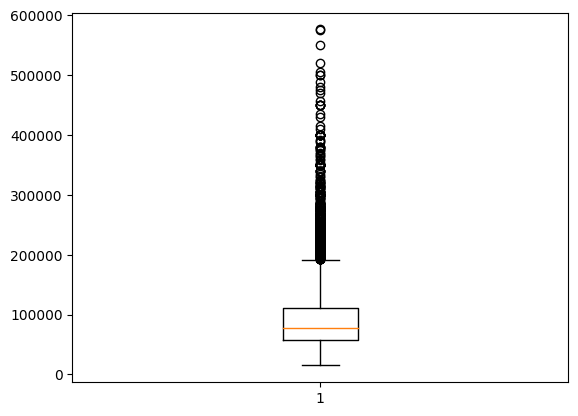

In [352]:
plt.boxplot(df['Annual Salary'])

### Plotting the Graphs

<Axes: title={'center': 'Top 10 Industry Count'}, xlabel='Industry', ylabel='Count'>

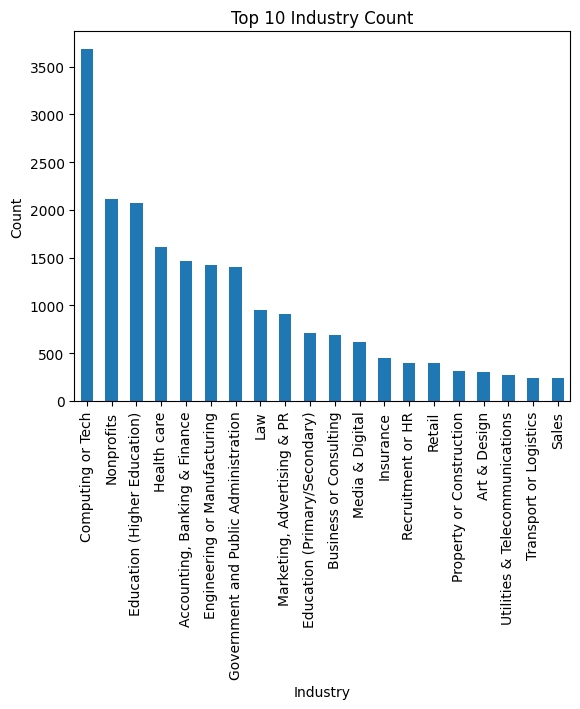

In [353]:
df['Industry'].value_counts()[0:20].plot(kind='bar',ylabel='Count',title="Top 10 Industry Count")

<Axes: title={'center': 'Top 50 Job Title Count'}, xlabel='Job title', ylabel='Count'>

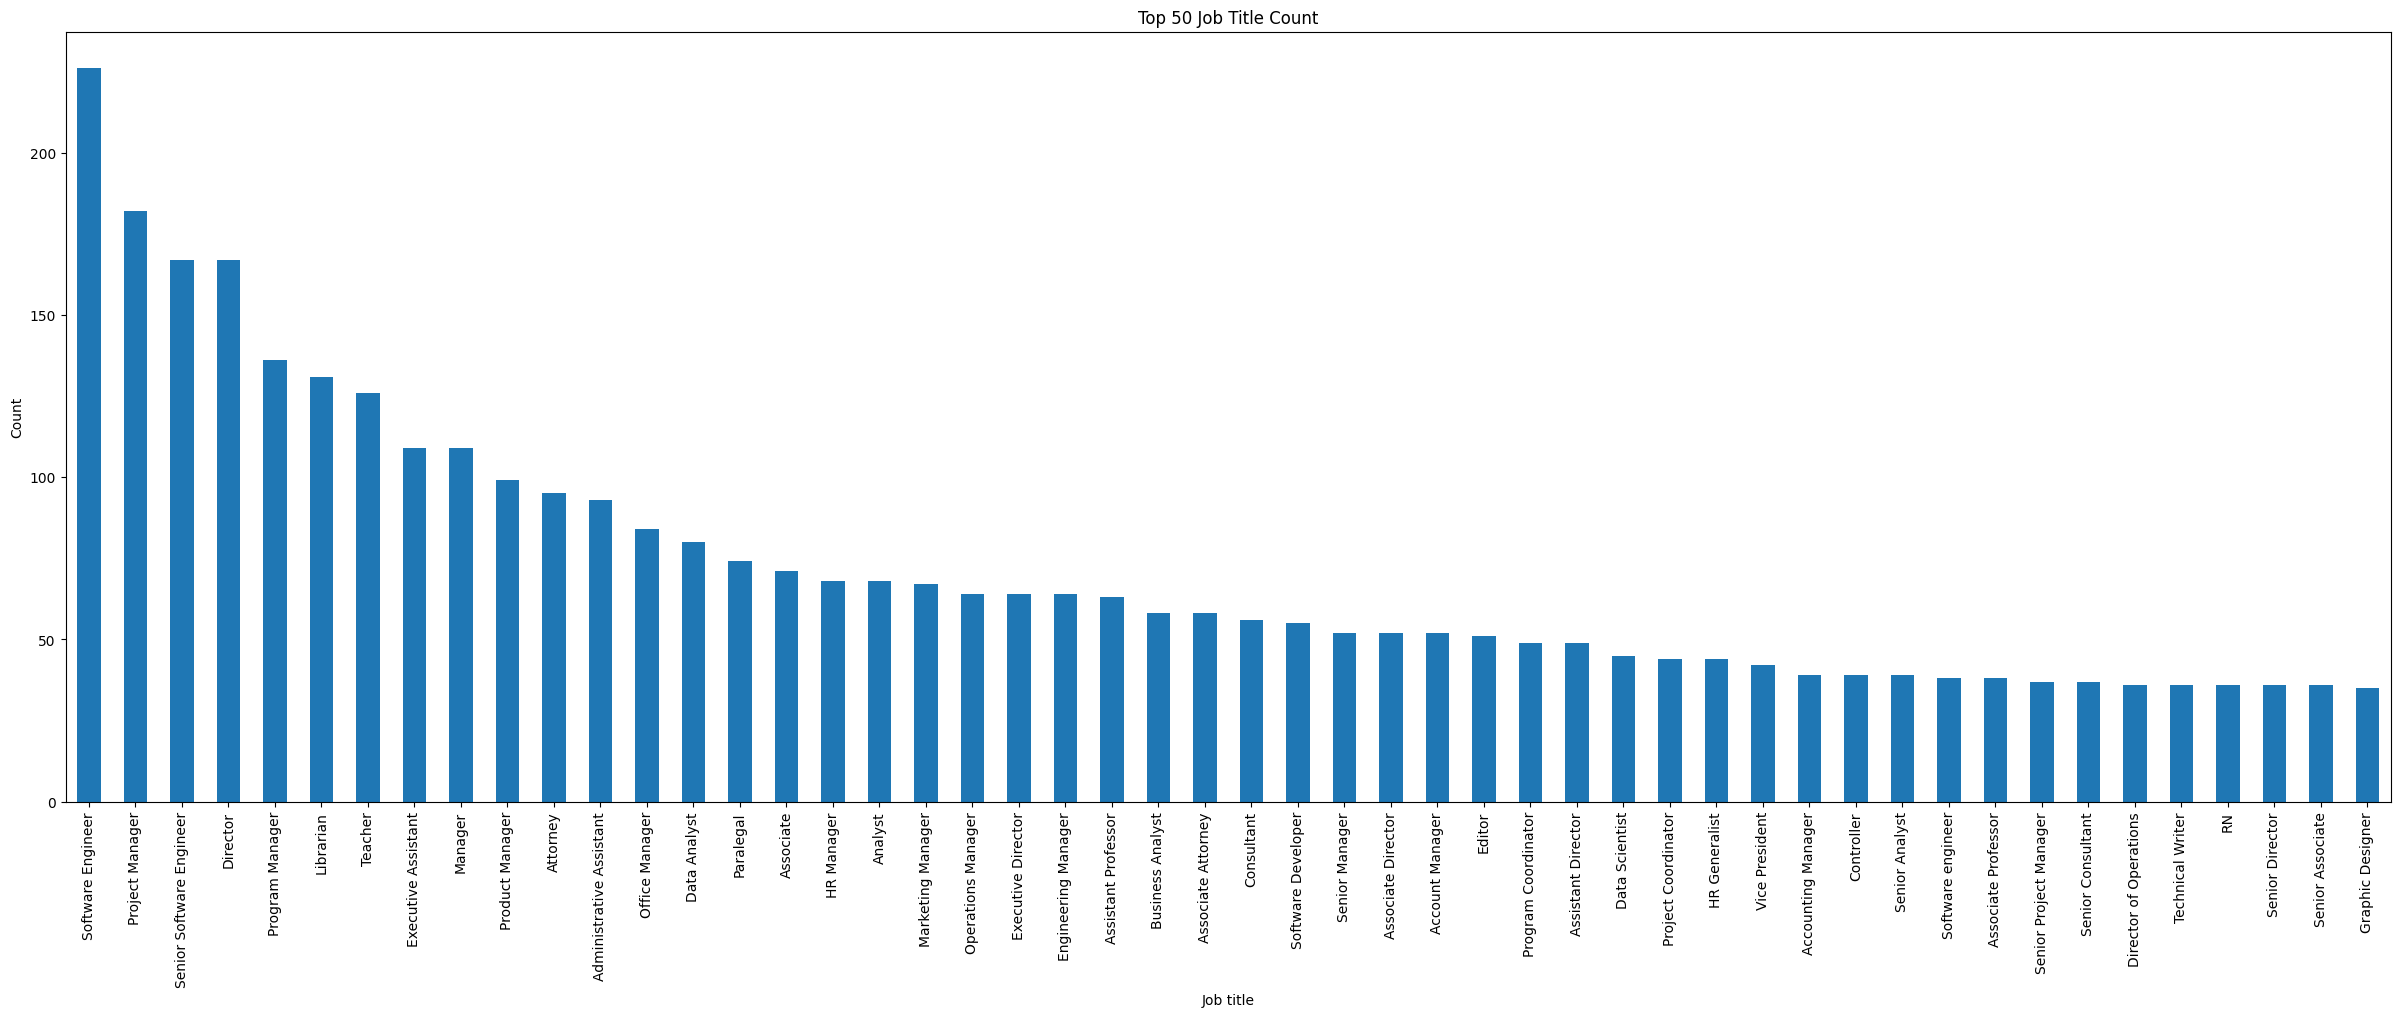

In [354]:
df['Job title'].value_counts()[0:50].plot(kind='bar',ylabel='Count',title="Top 50 Job Title Count",figsize=(30,10))

In [355]:
temp_df = df[df['Job title'].isin(df['Job title'].value_counts()[0:10].index)]

In [356]:
temp_df = df[df['Industry'].isin(df['Industry'].value_counts()[0:10].index)]

In [357]:
srt = temp_df.groupby('Industry')['Annual Salary'].mean().sort_values(ascending=False)

<Axes: title={'center': 'Top 10 Industry mean Annual Salary'}, xlabel='Industry', ylabel='Annual Salary'>

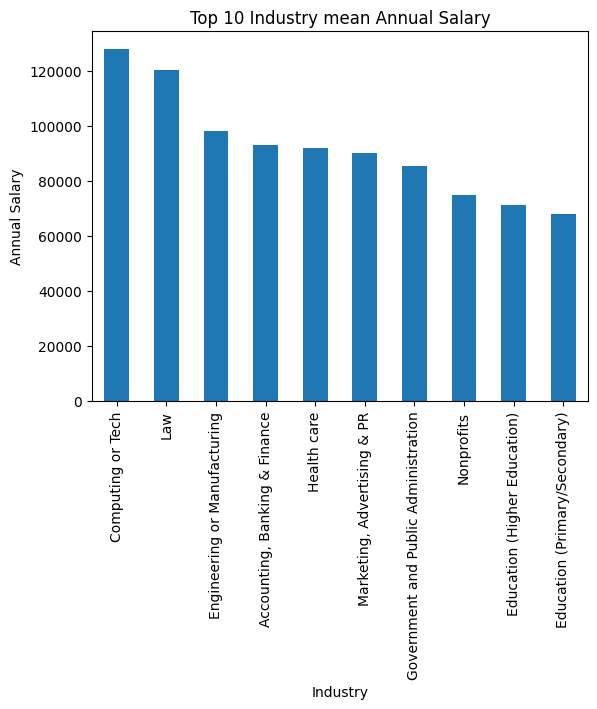

In [358]:
srt.plot(kind='bar',ylabel='Annual Salary',title="Top 10 Industry mean Annual Salary")

In [359]:
temp_df = df[df['Job title'].isin(df['Job title'].value_counts()[0:10].index)]

In [360]:
srt = temp_df.groupby('Job title')['Annual Salary'].mean().sort_values(ascending=False)

<Axes: title={'center': 'Top 10 Job Tile mean Annual Salary'}, xlabel='Job title', ylabel='Anunual Salary'>

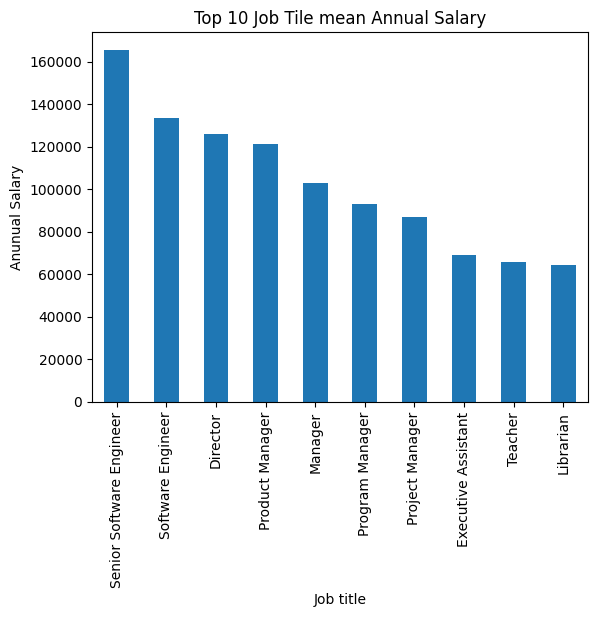

In [361]:
srt.plot(kind='bar',ylabel='Anunual Salary',title="Top 10 Job Tile mean Annual Salary")

In [362]:
val = df.groupby("Age")['Annual Salary'].mean().tolist()
index = df.groupby("Age")['Annual Salary'].mean().index

<ipython-input-363-482342b6989c>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Annual Salary')

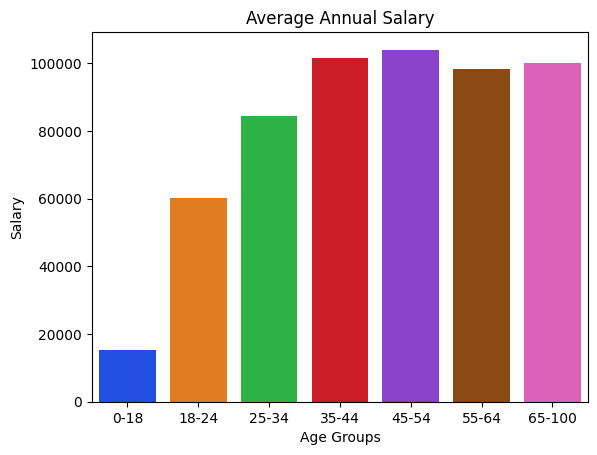

In [363]:
sns.barplot(x=index,y=val,palette='bright')
plt.xlabel('Age Groups')
plt.ylabel('Salary')
plt.title('Average Annual Salary')

In [364]:
val2 = df.groupby(['Total Work Experience'])['Annual Salary'].mean().tolist()
index2 = df.groupby(['Total Work Experience'])['Annual Salary'].mean().index

In [365]:
val_2 = df.groupby(['Relevant Work Experience'])['Annual Salary'].mean().tolist()

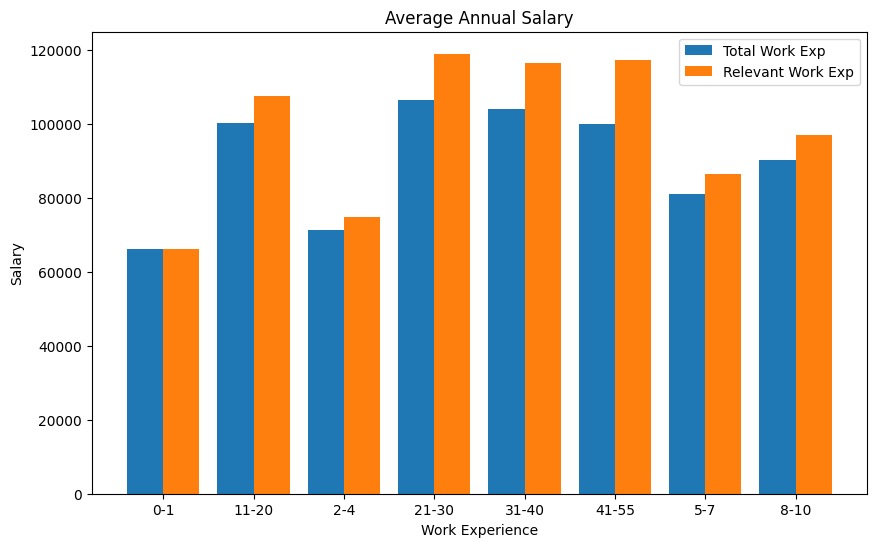

In [366]:
X_axis = np.arange(len(index2))
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, val2, 0.4, label = 'Total Work Exp')
plt.bar(X_axis + 0.2, val_2, 0.4, label = 'Relevant Work Exp')
plt.xticks(X_axis,index2)
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Average Annual Salary")
plt.legend()
plt.show()

In [367]:
stateIndex = df.groupby('State')['Annual Salary'].mean().sort_values(ascending=False).index[0:10]
stateVal = df.groupby('State')['Annual Salary'].mean().sort_values(ascending=False).tolist()[0:10]

<ipython-input-368-4d119dd7af74>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Annual Salary')

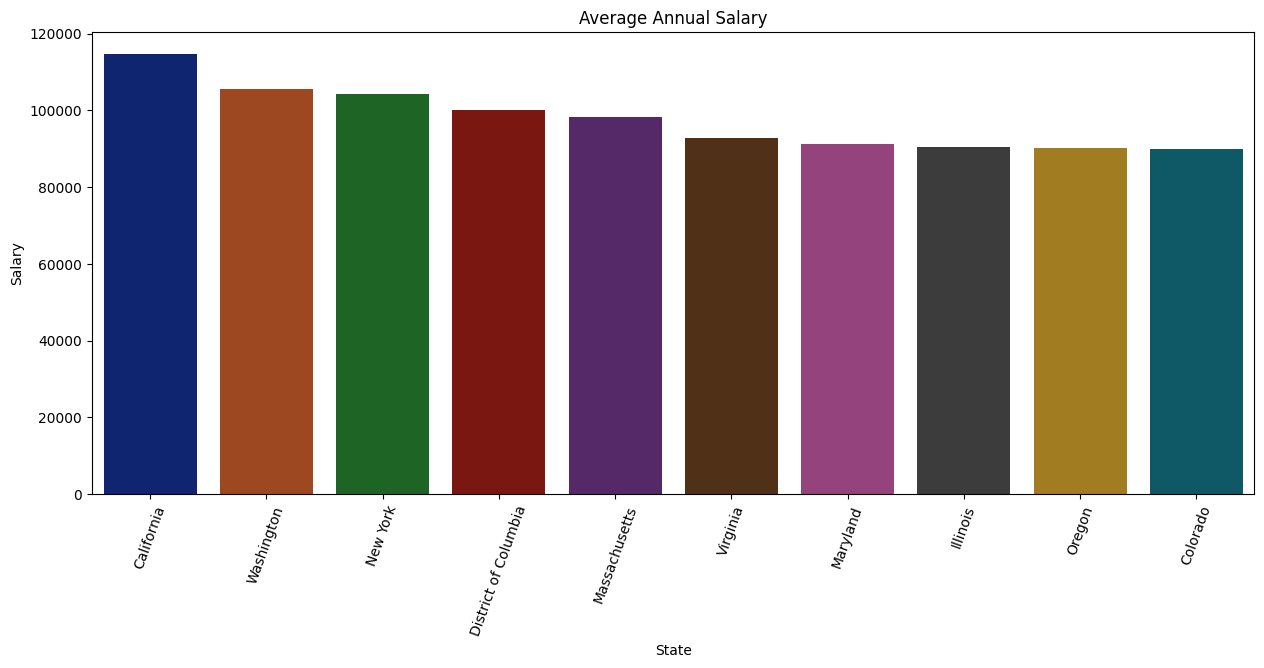

In [368]:
plt.figure(figsize=(15,6))
sns.barplot(x=stateIndex,y=stateVal,palette='dark')
plt.xlabel('State')
plt.ylabel('Salary')
plt.xticks(rotation=70)
plt.title('Average Annual Salary')

In [369]:
degreeIndex = df.groupby('Education Degree')['Annual Salary'].mean().index
degreeVal = df.groupby('Education Degree')['Annual Salary'].mean().tolist()

<ipython-input-370-3bd81f6f27c1>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Annual Salary based on degree')

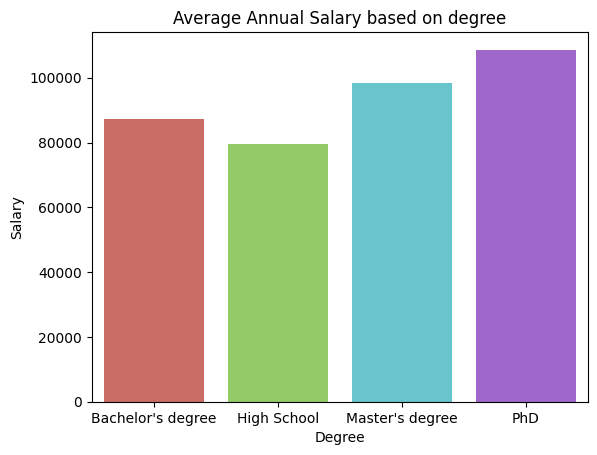

In [370]:
sns.barplot(x=degreeIndex,y=degreeVal,palette='hls')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Average Annual Salary based on degree')

[Text(0.5, 1.0, 'Exp vs Degree vs Salary')]

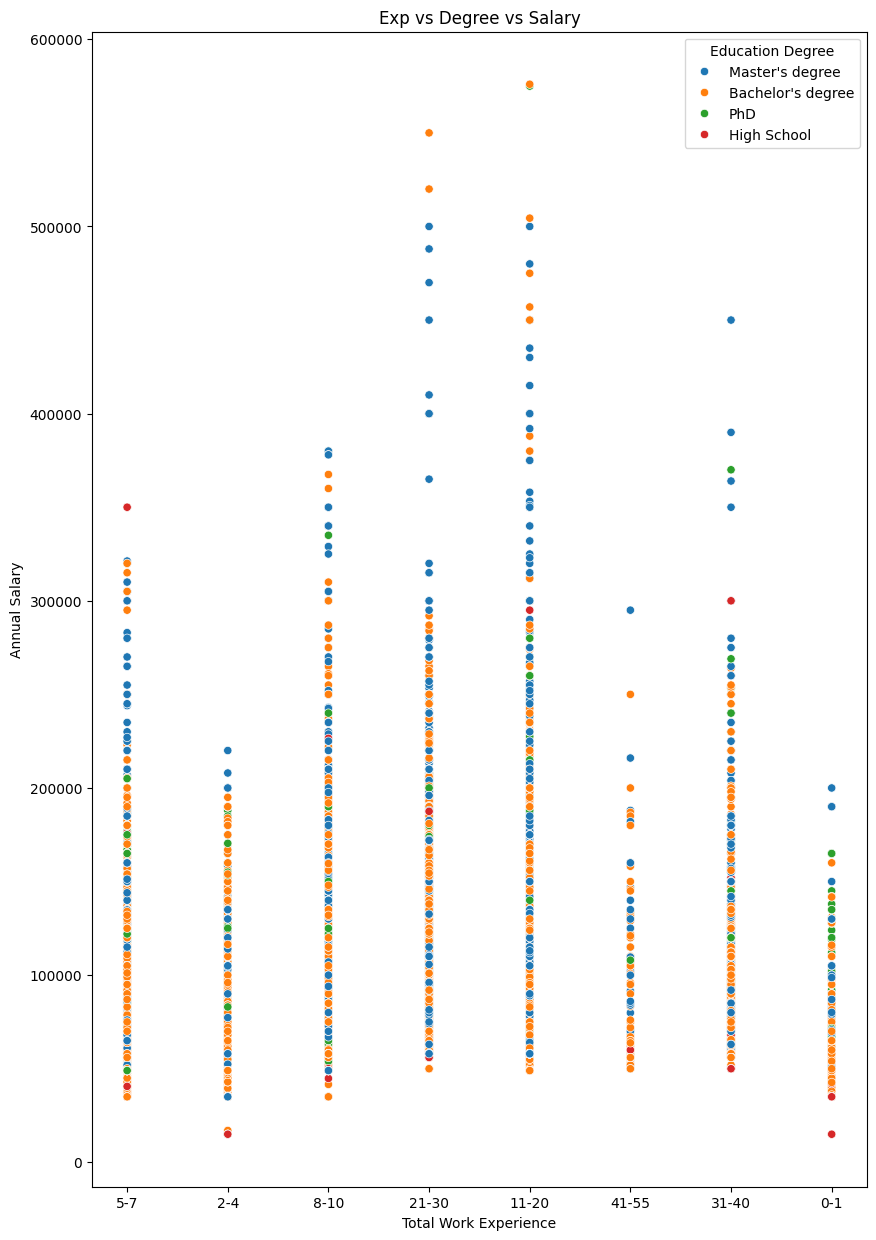

In [371]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.scatterplot(x="Total Work Experience",
                    y="Annual Salary",
                    hue="Education Degree",
                    data=df,ax=ax).set(title="Exp vs Degree vs Salary")

In [372]:
topIndustries = df['Industry'].value_counts()[:5].index

In [373]:
topIndustries

Index(['Computing or Tech', 'Nonprofits', 'Education (Higher Education)',
       'Health care', 'Accounting, Banking & Finance'],
      dtype='object', name='Industry')

In [374]:
temp_indexes = df['Industry'].isin(topIndustries)

In [375]:
temp_df = df[temp_indexes]

In [376]:
temp_df.head()

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,USA,Massachusetts,Boston,5-7,5-7,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,49000.0,NaN,USD,USA,Tennessee,Chattanooga,2-4,2-4,Bachelor's degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8-10,5-7,Bachelor's degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,USA,South Carolina,Greenville,8-10,5-7,Bachelor's degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000.0,NaN,USD,USA,New Hampshire,Hanover,8-10,2-4,Master's degree,Man,White


[Text(0.5, 1.0, 'Exp vs Industry vs Salary')]

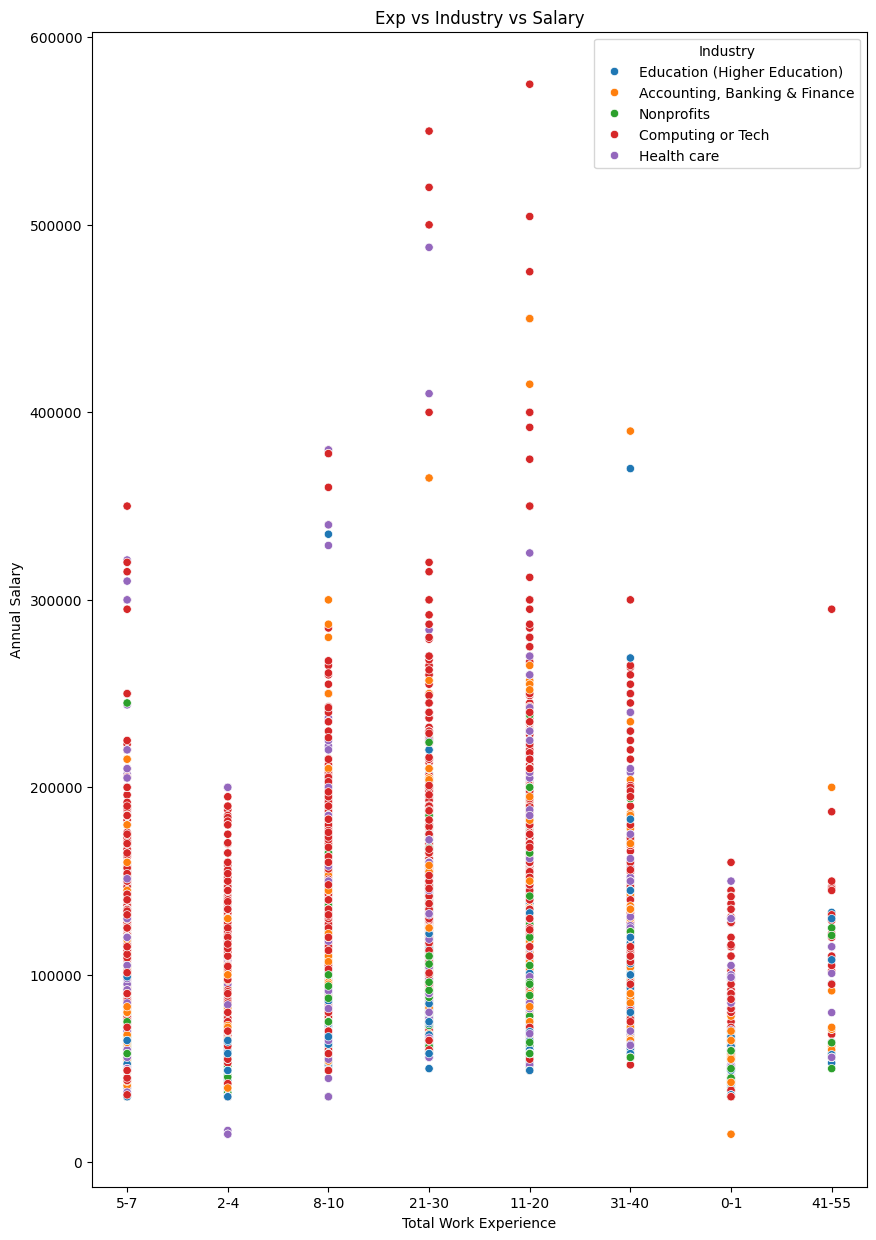

In [377]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.scatterplot(x="Total Work Experience",
                    y="Annual Salary",
                    hue="Industry",
                    data=temp_df,ax=ax).set(title="Exp vs Industry vs Salary")

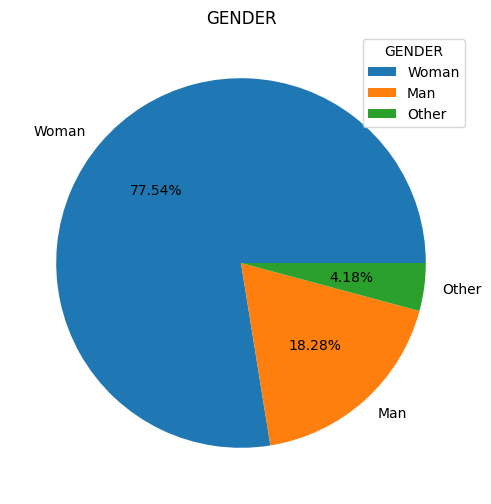

In [378]:
plt.figure(figsize=(8,6))
plt.pie(df['Gender'].value_counts().tolist(), labels = df['Gender'].value_counts().index, autopct='%1.2f%%')
plt.legend(title = "GENDER")
plt.title('GENDER')
plt.show()

In [379]:
genderIndex = df.groupby("Gender")['Annual Salary'].mean().index
genderSal = df.groupby("Gender")['Annual Salary'].mean().tolist()

In [380]:
genderSal

[113211.3732125834, 83491.53541666667, 87886.82168539325]

Text(0.5, 1.0, 'Average Annual Salary')

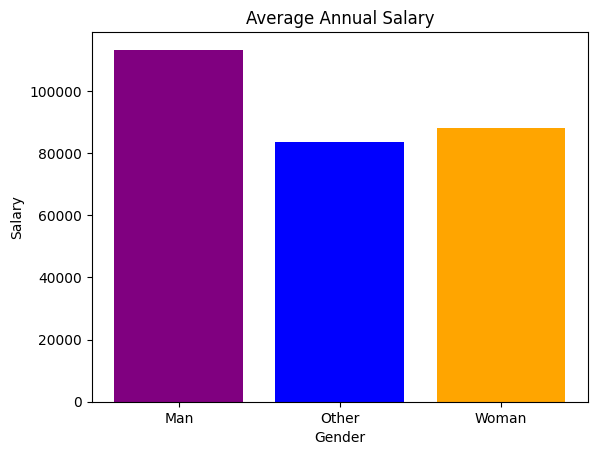

In [381]:
plt.bar(genderIndex,genderSal,color=['purple','blue','orange'])
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Average Annual Salary')

In [382]:
df['Industry'].nunique() #There are in total 845 different types of industries that exist in our database

1028

In [383]:
industry_list = df['Industry'].value_counts()[0:10].index.tolist() #created a list of top industries present in our dataset

In [384]:
df['Industry'] = df.apply(lambda row: 'Other' if row['Industry'] not in industry_list else row['Industry'], axis=1) #replaced all the industries apart from the top industries by 'Other'

In [385]:
df['Job title'].nunique() #There are in total 9493 different types of Job title that exists in our database

11943

In [386]:
job_list = df['Job title'].value_counts()[0:500].index.tolist() #created a list of top job titles present in our dataset

In [387]:
df['Job title'] = df.apply(lambda row: 'Other' if row['Job title'] not in job_list else row['Job title'], axis=1) #replaced all the job titles apart from the top job titles by 'Other'

###Preprocessing the bonus data

In [388]:
df['Bonus'].isna().sum()

5733

In [389]:
df[df['Annual Salary'] <= df['Bonus']]

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
321,4/27/2021 11:08:11,35-44,Computing or Tech,Software Engineer,156000.0,189000.0,USD,USA,Massachusetts,Metro Boston,21-30,21-30,Master's degree,Other,Another option not listed here or prefer not t...
384,4/27/2021 11:09:10,45-54,Computing or Tech,Other,175000.0,175000.0,USD,USA,Colorado,Denver,21-30,11-20,Bachelor's degree,Man,White
1196,4/27/2021 11:21:39,45-54,Other,Other,95000.0,100000.0,USD,USA,Pennsylvania,Philadelphia,21-30,21-30,Bachelor's degree,Woman,White
1240,4/27/2021 11:22:19,35-44,Computing or Tech,Other,128000.0,137000.0,USD,USA,Washington,Seattle,11-20,5-7,Bachelor's degree,Woman,White
1343,4/27/2021 11:24:17,35-44,Computing or Tech,Software Development Manager,250000.0,850000.0,USD,USA,Washington,Seattle,11-20,11-20,Master's degree,Man,"Asian or Asian American, Another option not li..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27555,12/8/2021 0:09:41,35-44,Computing or Tech,Senior Customer Success Manager,115000.0,207000.0,USD,USA,Massachusetts,Boston,11-20,2-4,Bachelor's degree,Woman,White
8999,4/27/2021 17:02:03,35-44,Computing or Tech,Other,58000.0,130000.0,USD,USA,Wisconsin,Madison,8-10,8-10,Master's degree,Man,White
19335,4/29/2021 9:03:46,35-44,Other,Senior Research Analyst,58000.0,62000.0,USD,USA,District of Columbia,Washington,11-20,5-7,Master's degree,Woman,White
21222,4/29/2021 23:07:19,55-64,Nonprofits,Other,56000.0,68000.0,USD,USA,California,Pleasant Hill,31-40,11-20,Bachelor's degree,Woman,White


In [390]:
df[0.20 * df['Annual Salary'] <= df['Bonus']]

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
40,4/27/2021 11:04:01,45-54,Engineering or Manufacturing,Lead Engineer,100000.0,50000.0,USD,USA,Georgia,waynesboro,21-30,21-30,Bachelor's degree,Woman,White
62,4/27/2021 11:04:29,65-100,Other,Other,104000.0,25000.0,USD,USA,Georgia,Atlanta,41-55,21-30,Bachelor's degree,Man,White
91,4/27/2021 11:05:05,55-64,Other,Other,180000.0,60000.0,USD,USA,Massachusetts,Boston,31-40,11-20,Master's degree,Woman,White
152,4/27/2021 11:06:00,55-64,Other,Other,114000.0,30000.0,USD,USA,Massachusetts,Cambridge,21-30,8-10,Bachelor's degree,Man,White
164,4/27/2021 11:06:07,35-44,Other,Other,58000.0,20000.0,USD,USA,Texas,Austin,11-20,11-20,Bachelor's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,5/8/2021 22:47:29,35-44,Other,software engineer,58000.0,25000.0,USD,USA,District of Columbia,washington,11-20,5-7,Master's degree,Man,Another option not listed here or prefer not t...
26072,5/11/2021 17:48:00,55-64,Other,Other,56000.0,40000.0,USD,USA,Minnesota,Minneapolis,31-40,31-40,Bachelor's degree,Woman,White
26167,5/14/2021 13:53:55,25-34,Other,Other,49000.0,30000.0,USD,USA,Virginia,Reston,11-20,8-10,Bachelor's degree,Woman,White
27028,10/26/2021 11:50:41,35-44,Law,Other,58000.0,15000.0,USD,USA,New York,New York City,11-20,2-4,Master's degree,Man,White


In [391]:
industry_list

['Computing or Tech',
 'Nonprofits',
 'Education (Higher Education)',
 'Health care',
 'Accounting, Banking & Finance',
 'Engineering or Manufacturing',
 'Government and Public Administration',
 'Law',
 'Marketing, Advertising & PR',
 'Education (Primary/Secondary)']

### Fetched records with null valeus from a survey and replacing them with minimum bonus point

In [392]:
industry_bonus_dict = {  #industry wise minimum bonus percent on salary
    'Computing or Tech' : 0.09,
    'Nonprofits' : 0.039,
    'Education (Higher Education)' : 0.04,
    'Accounting, Banking & Finance' : 0.123,
    'Health care' : 0.04,
    'Engineering or Manufacturing' : 0.075,
    'Government and Public Administration' : 0.04,
    'Law' : 0.05,
    'Marketing, Advertising & PR' : 0.04,
    'Education (Primary/Secondary)' : 0.04,
    'Other' : 0.04
}

In [393]:
temp = df[df['Bonus'].isna()]

In [394]:
temp

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,49000.0,NaN,USD,USA,Tennessee,Chattanooga,2-4,2-4,Bachelor's degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Other,62000.0,NaN,USD,USA,New Hampshire,Hanover,8-10,2-4,Master's degree,Man,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,50000.0,NaN,USD,USA,Arizona,Yuma,5-7,5-7,Master's degree,Man,White
17,4/27/2021 11:03:19,45-54,Other,graphic designer,59000.0,NaN,USD,USA,California,Pomona,21-30,21-30,Bachelor's degree,Woman,White
19,4/27/2021 11:03:23,35-44,Education (Higher Education),Other,58000.0,NaN,USD,USA,Florida,Boca Raton,11-20,11-20,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,5/27/2021 12:26:02,25-34,Other,Producer,49000.0,NaN,USD,USA,Washington,Seattle,8-10,8-10,Bachelor's degree,Woman,White
27631,1/24/2022 0:57:43,35-44,Computing or Tech,Other,58000.0,NaN,USD,USA,Texas,Austin,8-10,8-10,Bachelor's degree,Man,White
27983,10/10/2023 10:35:37,18-24,Other,Other,35000.0,NaN,USD,USA,Michigan,East lansing,0-1,0-1,High School,Man,White
27995,11/26/2023 17:38:00,18-24,Education (Higher Education),Other,35000.0,NaN,USD,USA,Texas,denton,2-4,0-1,Master's degree,Other,Black or African American


In [395]:
df.drop(df.loc[df['Bonus'].isna()].index,inplace=True)

In [396]:
df['Bonus'] = df.apply(lambda row: industry_bonus_dict[row['Industry']]*row['Annual Salary'] if row['Bonus']>=0.20*row['Annual Salary'] else row['Bonus'], axis=1) #replaced bonus with given percent if bonus is greater than 25% of annual salary'

In [397]:
temp['Bonus'] = temp.apply(lambda row: industry_bonus_dict[row['Industry']]*row['Annual Salary'], axis=1) #replaced bonus with given percent of annual salary for respective industry

<ipython-input-397-02692696e12b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [398]:
df=pd.concat([df,temp])

<Axes: >

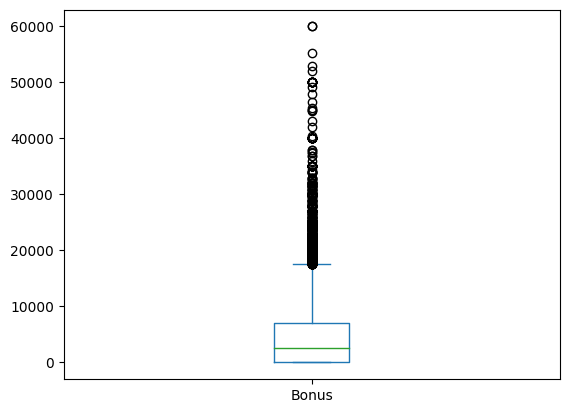

In [399]:
df['Bonus'].plot(kind='box')

In [400]:
df[df['Bonus'] >= 20000].sample(20)

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
26691,8/16/2021 22:41:38,25-34,Computing or Tech,Senior Data Analyst,110000.0,20000.0,USD,USA,New York,NYC,5-7,5-7,Bachelor's degree,Man,Asian or Asian American
11214,4/27/2021 23:45:41,25-34,Computing or Tech,Other,160000.0,20000.0,USD,USA,Illinois,Chicago,5-7,5-7,Master's degree,Man,White
1007,4/27/2021 11:18:31,45-54,"Accounting, Banking & Finance",Other,390000.0,47970.0,USD,USA,Michigan,Detroit,31-40,31-40,Master's degree,Man,White
8808,4/27/2021 16:43:25,35-44,Computing or Tech,Content Manager,165000.0,30000.0,USD,USA,Washington,Seattle,11-20,11-20,Bachelor's degree,Woman,White
14202,4/28/2021 14:11:30,25-34,Computing or Tech,Marketing Director,180000.0,20000.0,USD,USA,California,San Francisco,8-10,8-10,Master's degree,Woman,Asian or Asian American
9994,4/27/2021 19:35:31,45-54,Other,Other,140000.0,25000.0,USD,USA,New Jersey,Holmdel,21-30,21-30,High School,Woman,White
25316,5/6/2021 12:30:54,35-44,Other,Other,120000.0,20000.0,USD,USA,Georgia,Atlanta,8-10,5-7,PhD,Man,White
14549,4/28/2021 14:57:34,35-44,Computing or Tech,Senior Software Engineer,150000.0,25000.0,USD,USA,Pennsylvania,Philadelphia,11-20,11-20,Bachelor's degree,Man,White
13746,4/28/2021 13:35:51,35-44,Computing or Tech,Other,226000.0,20340.0,USD,USA,California,San Francisco,21-30,21-30,Bachelor's degree,Other,White
24992,5/6/2021 0:09:26,25-34,Computing or Tech,Other,160000.0,30000.0,USD,USA,Washington,Seattle,5-7,5-7,Bachelor's degree,Woman,White


<ipython-input-401-be860324bfe6>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Bonus', ylabel='Density'>

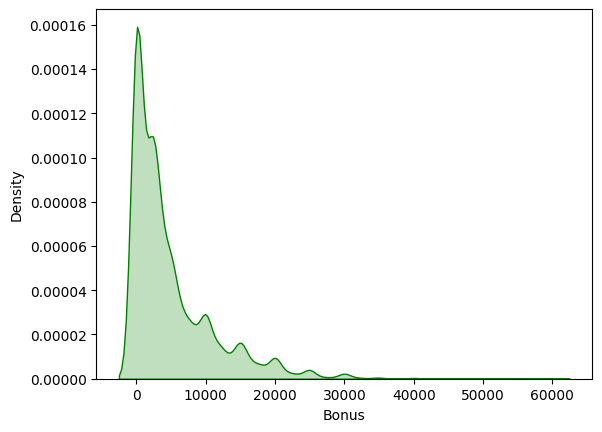

In [401]:
sns.kdeplot(df['Bonus'],color='green',shade=True)

In [402]:
bonusIndex = df.groupby('Industry')['Bonus'].mean().sort_values().index
bonusVal = df.groupby('Industry')['Bonus'].mean().sort_values().tolist()

In [403]:
bonusIndex,bonusVal

(Index(['Education (Primary/Secondary)', 'Education (Higher Education)',
        'Nonprofits', 'Government and Public Administration', 'Health care',
        'Other', 'Marketing, Advertising & PR', 'Law',
        'Engineering or Manufacturing', 'Accounting, Banking & Finance',
        'Computing or Tech'],
       dtype='object', name='Industry'),
 [1574.7781355932202,
  1632.4932560386474,
  1742.9337875059157,
  1825.861542857143,
  3961.9659764414137,
  4250.939414074298,
  4637.35399122807,
  6193.426365546219,
  6391.404806338028,
  8376.48248495212,
  9730.128376764385])

<ipython-input-404-0a675d4e0ae1>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




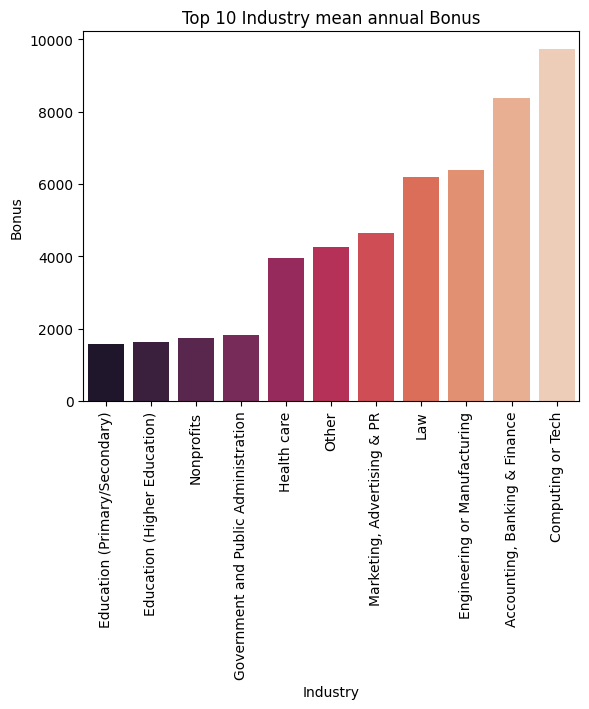

In [404]:
sns.barplot(x=bonusIndex,y=bonusVal,palette='rocket')
plt.xticks(rotation=90)
plt.ylabel("Bonus")
plt.title("Top 10 Industry mean annual Bonus")
plt.show()

In [405]:
df['Timestamp'] = pd.DatetimeIndex(df['Timestamp']).year

In [406]:
df

,Timestamp,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Total Work Experience,Relevant Work Experience,Education Degree,Gender,Race
0,2021,25-34,Education (Higher Education),Other,55000.0,0.0,USD,USA,Massachusetts,Boston,5-7,5-7,Master's degree,Woman,White
3,2021,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8-10,5-7,Bachelor's degree,Woman,White
4,2021,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,USA,South Carolina,Greenville,8-10,5-7,Bachelor's degree,Woman,White
6,2021,25-34,Other,Other,49000.0,2000.0,USD,USA,South Carolina,Columbia,2-4,2-4,Bachelor's degree,Woman,White
8,2021,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,USA,Missouri,St. Louis,21-30,21-30,Bachelor's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,2021,25-34,Other,Producer,49000.0,1960.0,USD,USA,Washington,Seattle,8-10,8-10,Bachelor's degree,Woman,White
27631,2022,35-44,Computing or Tech,Other,58000.0,5220.0,USD,USA,Texas,Austin,8-10,8-10,Bachelor's degree,Man,White
27983,2023,18-24,Other,Other,35000.0,1400.0,USD,USA,Michigan,East lansing,0-1,0-1,High School,Man,White
27995,2023,18-24,Education (Higher Education),Other,35000.0,1400.0,USD,USA,Texas,denton,2-4,0-1,Master's degree,Other,Black or African American


In [407]:
timeIndex = df.groupby('Timestamp')['Annual Salary'].mean().sort_values(ascending=False).index
timeVal = df.groupby('Timestamp')['Annual Salary'].mean().sort_values(ascending=False).tolist()

In [408]:
timeIndex,timeVal

(Index([2021, 2022, 2024, 2023], dtype='int32', name='Timestamp'),
 [92376.4461674398, 92010.26294820716, 87071.875, 76734.01851851853])

<ipython-input-409-606d397d7670>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Salary')

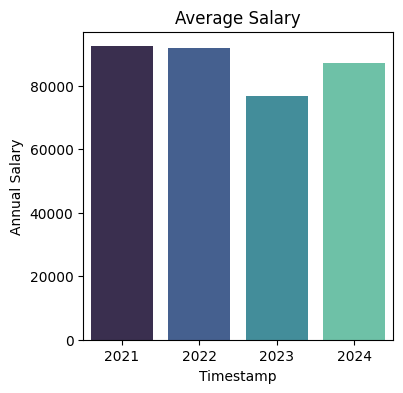

In [409]:
plt.figure(figsize=(4,4))
sns.barplot(x=timeIndex,y=timeVal,palette='mako')
plt.xlabel('Timestamp')
plt.ylabel('Annual Salary')
plt.title('Average Salary')

[Text(0.5, 1.0, 'Timestamp vs Industry vs Salary')]

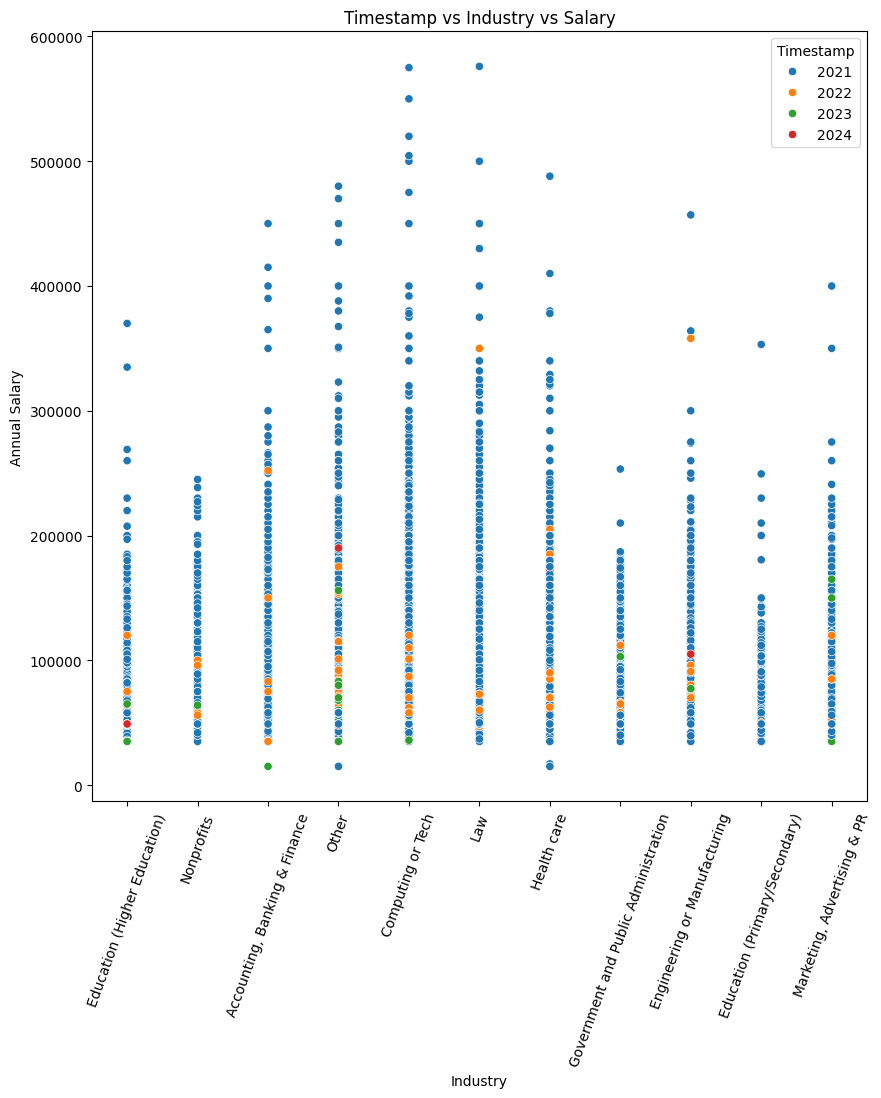

In [410]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation=70)

sns.scatterplot(x="Industry",
                    y="Annual Salary",
                    hue="Timestamp",
                    data=df,ax=ax,palette='tab10').set(title="Timestamp vs Industry vs Salary")


<Figure size 1000x1000 with 0 Axes>

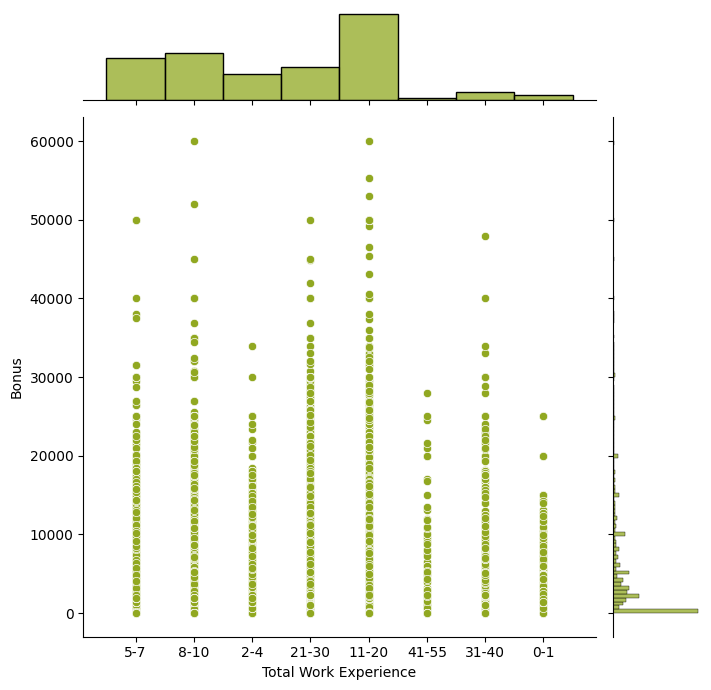

In [411]:
plt.figure(figsize=(10,10))
sns.jointplot(data=df,x=df['Total Work Experience'],y=df['Bonus'],color='#91A821',height=7)

###Preprocessing the race

In [414]:
race_list = ['White','Asian or Asian American','Black or African American','Hispanic, Latino, or Spanish origin']

In [415]:
df['Race'] = df.apply(lambda row: row['Race'] if row['Race'] in race_list else 'Others', axis=1) #replaced race with 5 genreci races and rest with others

In [416]:
sal_idx= df.groupby('Race')['Annual Salary'].mean().sort_values(ascending=False).index
sal_val = df.groupby('Race')['Annual Salary'].mean().sort_values(ascending=False).tolist()

<ipython-input-434-e010a4b018a1>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4],
 [Text(0, 0, 'Asian or Asian American'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Black or African American'),
  Text(3, 0, 'White'),
  Text(4, 0, 'Hispanic, Latino, or Spanish origin')])

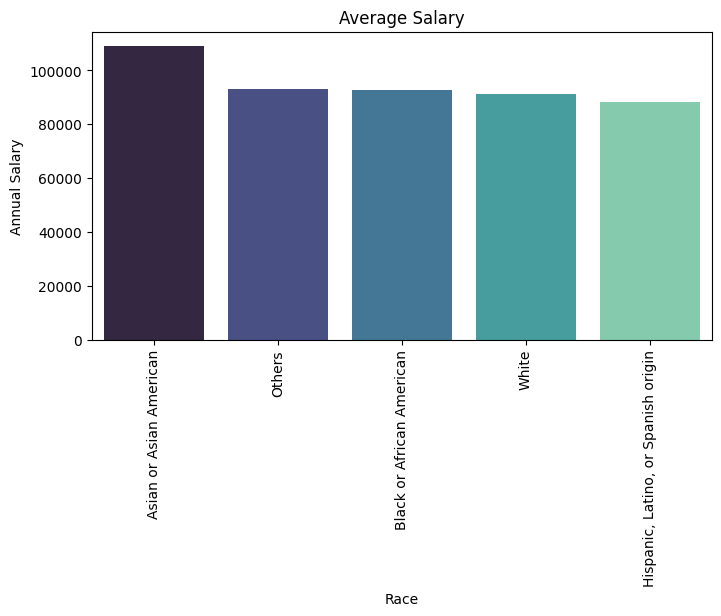

In [434]:
plt.figure(figsize=(8,4))
sns.barplot(x=sal_idx,y=sal_val,palette='mako')
plt.xlabel('Race')
plt.ylabel('Annual Salary')
plt.title('Average Salary')
plt.xticks(rotation=90)

In [418]:
sal = pd.cut(df['Annual Salary'], bins=10)

In [419]:
sal.value_counts()

Annual Salary
(14439.0, 71100.0]      9776
(71100.0, 127200.0]     9078
(127200.0, 183300.0]    3003
(183300.0, 239400.0]     773
(239400.0, 295500.0]     205
(295500.0, 351600.0]      72
(351600.0, 407700.0]      28
(407700.0, 463800.0]      10
(463800.0, 519900.0]       7
(519900.0, 576000.0]       4
Name: count, dtype: int64

###The data equal splits on average salary of 80000 hence splitting the salary above and below this value

In [420]:
df['Annual Salary'] = df.apply(lambda row: '>80000' if row['Annual Salary']>80000 else '<=80000', axis=1) #replaced bonus with given percent if bonus is greater than 25% of annual salary'

In [421]:
df['Annual Salary'].value_counts()

Annual Salary
<=80000    12088
>80000     10868
Name: count, dtype: int64

In [422]:
df['Race'].value_counts()

Race
White                                  19155
Others                                  1599
Asian or Asian American                 1093
Black or African American                589
Hispanic, Latino, or Spanish origin      520
Name: count, dtype: int64

###Checking if Race and Gender affect the Salary (target) or not

In [424]:
Crossres= pd.crosstab(index=df['Race'],columns=df['Annual Salary'])

In [425]:
Crossres

Annual Salary,<=80000,>80000
Race,,
Asian or Asian American,385,708
Black or African American,308,281
"Hispanic, Latino, or Spanish origin",285,235
Others,828,771
White,10282,8873


In [426]:
ChiSqResult = chi2_contingency(Crossres)

In [427]:
ChiSqResult

Chi2ContingencyResult(statistic=142.7382819156877, pvalue=7.316937094129904e-30, dof=4, expected_freq=array([[  575.54382297,   517.45617703],
       [  310.15124586,   278.84875414],
       [  273.81773828,   246.18226172],
       [  841.98954522,   757.01045478],
       [10086.49764767,  9068.50235233]]))

###Creating the target and feature variables

In [428]:
x=df.drop(['City','Currency','Country','Annual Salary','Total Work Experience'],axis=1)

In [436]:
y=df['Annual Salary'] #target variable

### Train test split

In [430]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=55)

In [437]:
label_encoder = LabelEncoder()

###Encoding the features as well as target

In [438]:
label_encoder.fit(y_train)

LabelEncoder()

In [439]:
label_encoder.classes_

array(['<=80000', '>80000'], dtype=object)

In [440]:
y_train_new=label_encoder.transform(y_train)
y_test_new = label_encoder.transform(y_test)

In [441]:
y_train.head()

4004      >80000
5820     <=80000
19316    <=80000
15085    <=80000
17422     >80000
Name: Annual Salary, dtype: object

In [442]:
y_train_new

array([1, 0, 0, ..., 0, 0, 0])

In [443]:
y_test_new

array([0, 0, 1, ..., 1, 1, 0])

###Using Frequency Encoding for features like State , Title, Industry and Race due to their high cardinality

In [444]:
state_grp = (x_train.groupby('State').size())/len(x_train)

In [445]:
state_grp

State
Alabama                 0.005352
Alaska                  0.002925
Arizona                 0.013380
Arkansas                0.003236
California              0.112764
Colorado                0.026511
Connecticut             0.009646
Delaware                0.000622
District of Columbia    0.042504
Florida                 0.023710
Georgia                 0.024084
Hawaii                  0.001182
Idaho                   0.004543
Illinois                0.052772
Indiana                 0.014189
Iowa                    0.008401
Kansas                  0.006223
Kentucky                0.007841
Louisiana               0.005476
Maine                   0.003236
Maryland                0.024519
Massachusetts           0.063227
Michigan                0.023088
Minnesota               0.029933
Mississippi             0.002303
Missouri                0.016678
Montana                 0.002614
Nebraska                0.004979
Nevada                  0.004045
New Hampshire           0.004543
New 

In [446]:
x_train['State']=x_train['State'].apply(lambda x: state_grp[x])
x_test['State']=x_test['State'].apply(lambda x: state_grp[x])

In [447]:
title_grp=(x_train.groupby('Job title').size())/len(x_train)

In [448]:
x_train['Job title']=x_train['Job title'].apply(lambda x: title_grp[x])
x_test['Job title']=x_test['Job title'].apply(lambda x: title_grp[x])

In [449]:
industry_grp=(x_train.groupby('Industry').size())/len(x_train)

In [450]:
x_train['Industry']=x_train['Industry'].apply(lambda x: industry_grp[x])
x_test['Industry']=x_test['Industry'].apply(lambda x: industry_grp[x])

In [451]:
race_grp=(x_train.groupby('Race').size())/len(x_train)

In [452]:
race_grp

Race
Asian or Asian American                0.048976
Black or African American              0.025515
Hispanic, Latino, or Spanish origin    0.023337
Others                                 0.070135
White                                  0.832037
dtype: float64

In [453]:
x_train['Race']=x_train['Race'].apply(lambda x: race_grp[x])
x_test['Race']=x_test['Race'].apply(lambda x: race_grp[x])

### Using ColumnTransformer API for easy data preprocessing

In [455]:
transformers = ColumnTransformer(
    transformers=[
        ('t1',OrdinalEncoder(categories=[
                                          ['0-1','2-4','5-7','8-10','11-20','21-30','31-40','41-55']]),['Relevant Work Experience']),
        ('t2',OrdinalEncoder(categories=[['0-18','65-100','18-24','25-34','35-44','45-54','55-64']]),['Age']),
        ('t3',OrdinalEncoder(categories=[["High School","Bachelor's degree","Master's degree","PhD"]]),['Education Degree']),
        ('t4',OneHotEncoder(sparse_output=False,drop='first'),['Gender']),
        ('t5',RobustScaler(),['Bonus'])
    ],
    remainder = 'passthrough'
)

In [456]:
x_train_new = transformers.fit_transform(x_train)

In [457]:
x_test_new = transformers.fit_transform(x_test)

In [458]:
x_test.head(2)

,Timestamp,Age,Industry,Job title,Bonus,State,Relevant Work Experience,Education Degree,Gender,Race
6253,2021,25-34,0.089925,0.623374,1911.0,0.112764,8-10,Master's degree,Woman,0.832037
8524,2021,25-34,0.289750,0.623374,300.0,0.096210,11-20,Bachelor's degree,Woman,0.832037


In [459]:
x_test_new[0]

array([ 3.00000000e+00,  3.00000000e+00,  2.00000000e+00,  0.00000000e+00,
        1.00000000e+00, -8.88726742e-02,  2.02100000e+03,  8.99246997e-02,
        6.23374199e-01,  1.12763707e-01,  8.32036841e-01])

In [460]:
x_train_new[0]

array([4.00000000e+00, 4.00000000e+00, 2.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 6.94285714e-01, 2.02100000e+03, 6.17960047e-02,
       4.35621383e-04, 3.37295414e-02, 2.55149667e-02])

In [461]:
transformers.get_feature_names_out()

array(['t1__Relevant Work Experience', 't2__Age', 't3__Education Degree',
       't4__Gender_Other', 't4__Gender_Woman', 't5__Bonus',
       'remainder__Timestamp', 'remainder__Industry',
       'remainder__Job title', 'remainder__State', 'remainder__Race'],
      dtype=object)

In [462]:
x_train.head(2)

,Timestamp,Age,Industry,Job title,Bonus,State,Relevant Work Experience,Education Degree,Gender,Race
4004,2021,35-44,0.061796,0.000436,7500.0,0.033730,11-20,Master's degree,Woman,0.025515
5820,2021,45-54,0.289750,0.623374,0.0,0.014189,2-4,Bachelor's degree,Woman,0.025515


In [463]:
x_train_new

array([[4.00000000e+00, 4.00000000e+00, 2.00000000e+00, ...,
        4.35621383e-04, 3.37295414e-02, 2.55149667e-02],
       [1.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        6.23374199e-01, 1.41888108e-02, 2.55149667e-02],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, ...,
        6.23374199e-01, 5.60084635e-02, 2.33368598e-02],
       ...,
       [2.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        6.23374199e-01, 1.12763707e-01, 7.01350426e-02],
       [4.00000000e+00, 5.00000000e+00, 1.00000000e+00, ...,
        6.23374199e-01, 2.30879333e-02, 8.32036841e-01],
       [4.00000000e+00, 4.00000000e+00, 2.00000000e+00, ...,
        6.23374199e-01, 9.62100940e-02, 8.32036841e-01]])

In [464]:
x_train_df = pd.DataFrame(x_train_new, columns=transformers.get_feature_names_out())

In [465]:
x_test_df = pd.DataFrame(x_test_new, columns=transformers.get_feature_names_out())

###Decision Tree Classifier

In [466]:
dt2 = DecisionTreeClassifier(max_depth=8,splitter='best')

In [467]:
dt2.fit(x_train_df , y_train_new)

DecisionTreeClassifier(max_depth=8)

In [468]:
y_pred = dt2.predict(x_test_df)

In [469]:
accuracy = accuracy_score(y_test_new, y_pred)
print(f"Accuracy of Decision Tree classifier: {accuracy}")

Accuracy of Decision Tree classifier: 0.7784231160156817


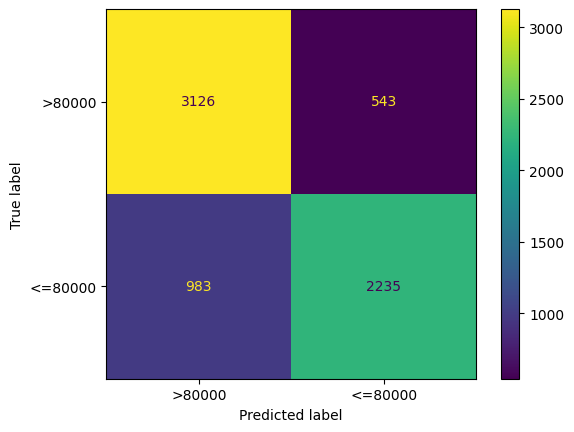

In [472]:
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>80000','<=80000'])
disp.plot();

In [474]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      3669
           1       0.80      0.69      0.75      3218

    accuracy                           0.78      6887
   macro avg       0.78      0.77      0.77      6887
weighted avg       0.78      0.78      0.78      6887



In [475]:
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)

print('recall score:', recall)
print('f1 score:', f1)
print('precision:', precision)

recall score: 0.694530764449969
f1 score: 0.7454969979986658
precision: 0.8045356371490281


###Random Forest Classifier

In [477]:
#Instantiating
rand_model = RandomForestClassifier(max_depth=15)
print("Model name = ", rand_model)
#fit model to data
rand_model.fit(x_train_df, y_train_new)


#make a prediction with the test data
y_pred = rand_model.predict(x_test_df)


#Evaluation metrics
accuracy= accuracy_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)

print('accuracy score:', accuracy)
print('recall score:', recall)
print('f1 score:', f1)
print('precision:', precision)
print(classification_report(y_test_new, y_pred))

Model name =  RandomForestClassifier(max_depth=15)
accuracy score: 0.8129809786554378
recall score: 0.7663144810441268
f1 score: 0.7929260450160771
precision: 0.82145236508994
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3669
           1       0.82      0.77      0.79      3218

    accuracy                           0.81      6887
   macro avg       0.81      0.81      0.81      6887
weighted avg       0.81      0.81      0.81      6887



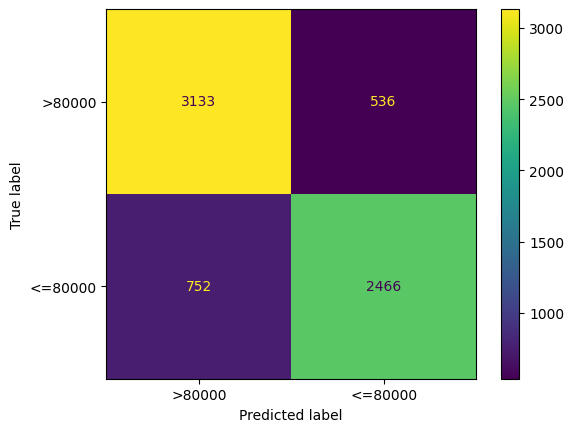

In [478]:
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>80000','<=80000'])
disp.plot();

###Logistic Regression

In [479]:
#Instantiating Logistic Regressor
lr_model = LogisticRegression(class_weight='balanced',solver='newton-cholesky')
print("Model name = ", lr_model)
#fit model to data
lr_model.fit(x_train_df, y_train_new)

#make a prediction with the test data
y_pred = lr_model.predict(x_test_df)

#Evaluation metrics
accuracy= accuracy_score(y_test_new, y_pred)

print('accuracy score:', accuracy)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)

print('recall score:', recall)
print('f1 score:', f1)
print('precision:', precision)
print(classification_report(y_test_new, y_pred))

Model name =  LogisticRegression(class_weight='balanced', solver='newton-cholesky')
accuracy score: 0.7625961957310876
recall score: 0.7178371659415786
f1 score: 0.7386091127098322
precision: 0.7606190319394139
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3669
           1       0.76      0.72      0.74      3218

    accuracy                           0.76      6887
   macro avg       0.76      0.76      0.76      6887
weighted avg       0.76      0.76      0.76      6887



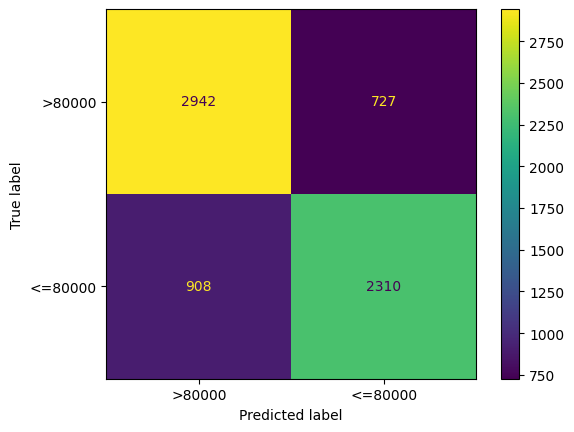

In [480]:
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>80000','<=80000'])
disp.plot();

###KNN

In [481]:
model = KNeighborsClassifier()
model.fit(x_train_df,y_train_new)
y_pred = model.predict(x_test_df)
print('accuracy score:', accuracy)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)

print('recall score:', recall)
print('f1 score:', f1)
print('precision:', precision)
print(classification_report(y_test_new, y_pred))

accuracy score: 0.7625961957310876
recall score: 0.7343070229956494
f1 score: 0.7409846346817184
precision: 0.7477848101265823
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3669
           1       0.75      0.73      0.74      3218

    accuracy                           0.76      6887
   macro avg       0.76      0.76      0.76      6887
weighted avg       0.76      0.76      0.76      6887



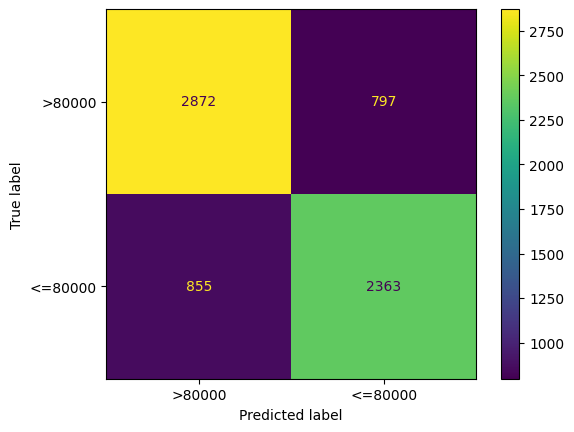

In [482]:
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>80000','<=80000'])
disp.plot();

###Naive Bayes Classifier

In [483]:
model = GaussianNB()
model.fit(x_train_df, y_train_new);

In [484]:
y_pred = model.predict(x_test_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



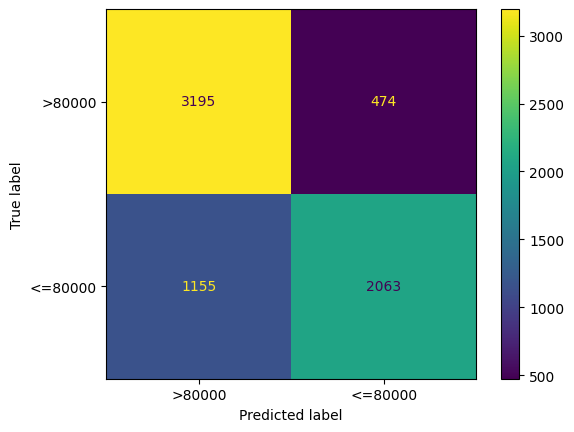

In [485]:
cm = confusion_matrix(y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['>80000','<=80000'])
disp.plot();

In [487]:
#calculating f1 score and accuracy
accuray = accuracy_score(y_pred, y_test_new)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)

print('accuracy :',accuracy)
print('recall score:', recall)
print('f1 score:', f1)
print('precision:', precision)
print(classification_report(y_test_new, y_pred))

accuracy : 0.7625961957310876
recall score: 0.6410814170292107
f1 score: 0.7169417897480452
precision: 0.8131651556957036
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      3669
           1       0.81      0.64      0.72      3218

    accuracy                           0.76      6887
   macro avg       0.77      0.76      0.76      6887
weighted avg       0.77      0.76      0.76      6887



###Successfully analysed the survey data, preprocessed it using several techniques, plotted various graphs and finally trained different classification models